# Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from itertools import combinations
df = pd.read_excel('autoMPG_data.xlsx')

# Assignment 4, Predective methods - TRTMK 24

Janne

# Part 1

## 1.1 Study variables one-by-one

Aineisto sisältää 392 autoa ilman puuttuvia arvoja pois lukien columinin "GallonsPer100MilesTo1981". Muuttujat kuvaavat polttoaineenkulutusta, moottorin kokoa ja auton massaa. Jakautumat ovat kohtuullisen laajoja ja useissa muuttujissa näkyy selkeä tekninen skaalautuminen esimerkiksi kun siirrytään 4-sylinterisistä moottoreista 8-sylinterisiin moottoreihin.

    Muuttuja kohtaiset havainnot:

    GallonsPer100Miles

- Keskikulutus 100 mailille on: 4.78 gallonaa

- Hajonta: 1.66, tämä vaihtelee merkittävästi

- Min–max arvon väli: 2.15-11.11, löytyy siis erittäin vähän kuluttavia autoja, sekä paljon kuluttavia autoja.

- Selitysaste: erittäin vahvasti sidoksissa kaikkiin moottorin kokoon liittyviin arvoihin. Negatiivinen MPG:n kanssa (-0.94), tämä johtuu pitkälti siitä, että Miles Per Gallon on johdannainen Gallons per 100 miles kanssa.

Tiivistelmä: Kulutus kasvaa lähes lineaarisesti sylinterien, moottoritilavuuden, hevosvoimien ja auton massan mukana.

    MPG

- Mailia gallonaa kohti on keskimäärin: 23.45 

- Min-max väli: 9-46.6 datassa on siis hyvin tehottomia, että erittäin taloudellisia autoja

- Selitysaste: vahva negatiivinen riippuvuus kulutukseen ja moottorin kokoon

Tulkinta: MPG toimii käytännössä GallonsPer100Miles-muuttujan peilikuvana.

    Cylinders

- Keskimäärin sylintereitä moottoreissa on: ~5.47, kaavioista näkee että valtaosa moottoreista on 4 sylinterisiä, hyvin vähä 3 ja 5 sylinterisiä, 6 ja 8 sylinterien summa on lähes sama kuin 4 sylinterisien moottorien määrä

- Kvartiilit: 4, 4, 8 Tämä tukee aikaisempaa päätelmää

- Selitysaste: erittäin korkea yhteys moottoritilavuuteen ~0.95 ja auton massaan ~0.90

Tulkinta: Noin puolet autoista ovat 4 sylinterisiä ja noin neljännes on 6 tai 8 sylinterisiä (yhteensä noin 50%).

    Displacement100ci

- Keskimäärin: 1.94 (~194 kuutiotuumaa)

- Hajonta: 1.05, eli laaja vaihtelu

- Selitysaste: käytännössä täydellinen lineaarinen riippuvuus sylintereihin, tehoon ja painoon

Tulkinta: Moottorin tilavuus on selvästi koko datasetin rakenteellinen perusakseli.

    Horsepower100

- Keskimäärin: 1.04 (~104 hp)

- Min-max: 0.46…2.3 (~46-230 hp)

- Selitysaste: erittäin voimakkaasti moottorin tilavuuden ja painon kanssa (0.86-0.90)

Tulkinta: Teho kasvaa odotetusti moottorin koon ja auton massan mukana.

    Weight1000lb

- Keskimäärin: ~2.98 (~2980 lb)

- Min–max: 1613…5140 lb, iso vaihteluväli

- Selitysaste: vahvin yhteys kulutukseen (0.885) ja moottorintilavuuteen (0.93)

Tulkinta: Paino on yksi tärkeimmistä kulutuksen ennustajista.

    Seconds0to60

- Keskimäärin: 15.54 s

- Min-max: 8-24.8 s

- Selitysaste: negatiivinen tehoon (-0.69), moottorintilavuuteen (-0.54), sylintereihin (-0.50)

Tulkinta: Nopeammat autot ovat tehokkaampia ja kevyempiä. Muuttuja toimii käänteisenä teho-painosuhteen mittarina.

### Basic info

In [3]:
df.head()

GallonsPer100Miles  GallonsPer100MilesTo1981   MPG  Cylinders  \
0            5.555556                  5.555556  18.0          8   
1            6.666667                  6.666667  15.0          8   
2            5.555556                  5.555556  18.0          8   
3            6.250000                  6.250000  16.0          8   
4            5.882353                  5.882353  17.0          8   

   Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  Year  \
0               3.07           1.30         3.504          12.0    70   
1               3.50           1.65         3.693          11.5    70   
2               3.18           1.50         3.436          11.0    70   
3               3.04           1.50         3.433          12.0    70   
4               3.02           1.40         3.449          10.5    70   

   Year70To81  Origin  Origin.Eq.1  Origin.Eq.2  Origin.Eq.3  \
0           1       1            1            0            0   
1           1       1            1            0            0   
2           1       1            1            0            0   
3           1       1            1            0            0   
4           1       1            1            0            0   

                        Name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino

In [4]:
df.describe()

GallonsPer100Miles  GallonsPer100MilesTo1981         MPG   Cylinders  \
count          392.000000                362.000000  392.000000  392.000000   
mean             4.782243                  4.912568   23.445918    5.471939   
std              1.663944                  1.659047    7.805007    1.705783   
min              2.145923                  2.145923    9.000000    3.000000   
25%              3.448276                  3.571429   17.000000    4.000000   
50%              4.396135                  4.651163   22.750000    4.000000   
75%              5.882353                  6.024744   29.000000    8.000000   
max             11.111111                 11.111111   46.600000    8.000000   

       Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  \
count          392.00000     392.000000    392.000000    392.000000   
mean             1.94412       1.044694      2.977584     15.541327   
std              1.04644       0.384912      0.849403      2.758864   
min              0.68000       0.460000      1.613000      8.000000   
25%              1.05000       0.750000      2.225250     13.775000   
50%              1.51000       0.935000      2.803500     15.500000   
75%              2.75750       1.260000      3.614750     17.025000   
max              4.55000       2.300000      5.140000     24.800000   

             Year  Year70To81      Origin  Origin.Eq.1  Origin.Eq.2  \
count  392.000000  392.000000  392.000000   392.000000   392.000000   
mean    75.979592    0.923469    1.576531     0.625000     0.173469   
std      3.683737    0.266185    0.805518     0.484742     0.379136   
min     70.000000    0.000000    1.000000     0.000000     0.000000   
25%     73.000000    1.000000    1.000000     0.000000     0.000000   
50%     76.000000    1.000000    1.000000     1.000000     0.000000   
75%     79.000000    1.000000    2.000000     1.000000     0.000000   
max     82.000000    1.000000    3.000000     1.000000     1.000000   

       Origin.Eq.3  
count   392.000000  
mean      0.201531  
std       0.401656  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

In [6]:
df.columns

Index(['GallonsPer100Miles', 'GallonsPer100MilesTo1981', 'MPG', 'Cylinders',
       'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60',
       'Year', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2',
       'Origin.Eq.3', 'Name'],
      dtype='object')

In [7]:
df.isnull().sum()

GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64

In [8]:
df.isna().sum()

GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64

### Visuals

GallonsPer100Miles on oikealle vino, hännän vuoksi.

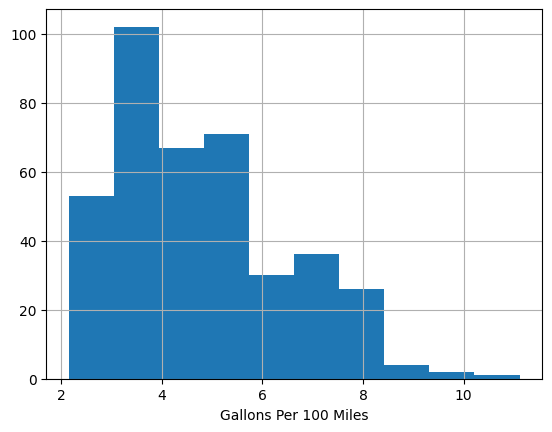

In [9]:
df['GallonsPer100Miles'].hist()
plt.xlabel('Gallons Per 100 Miles');

MPG oikealle vino

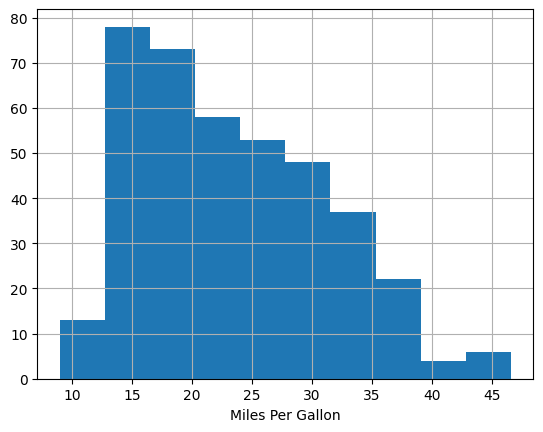

In [10]:
df['MPG'].hist()
plt.xlabel('Miles Per Gallon');

Sylinterit on monihuippuisia, jakauma muodostaa 3 selkeää keskittymää

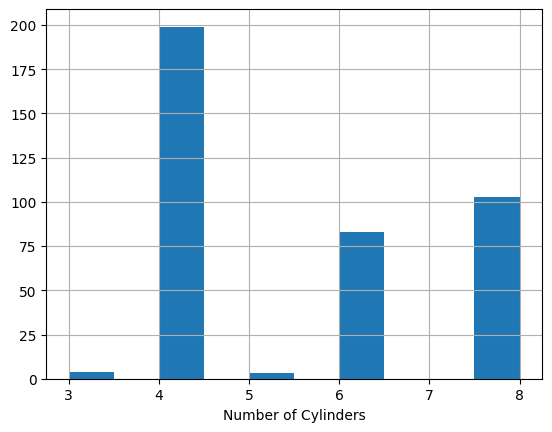

In [11]:
df['Cylinders'].hist()
plt.xlabel('Number of Cylinders');

Displacement100ci on myös monihuippuinen, kuvasta muodostuu 3 selvää "rykelmää" eikä selvää vinoumaa. Heikko oikealle vinouma, mutta on kuitenkin 3 selvää huippua.

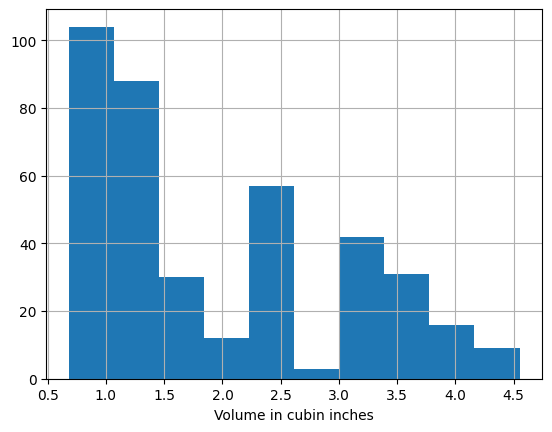

In [12]:
df['Displacement100ci'].hist()
plt.xlabel('Volume in cubin inches');

Horsepower100 on oikealle vino, 1 selkeä huippu.

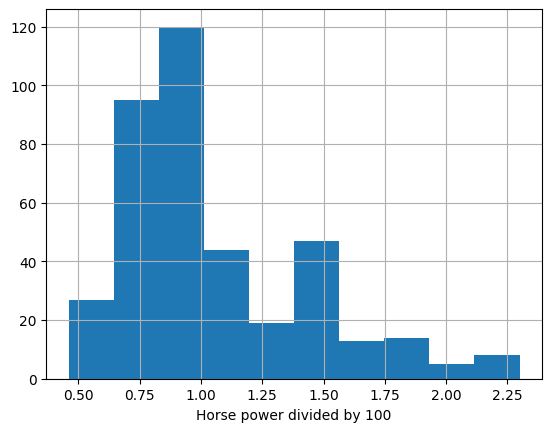

In [13]:
df['Horsepower100'].hist()
plt.xlabel('Horse power divided by 100');

Weight1000lb on oikealle vino

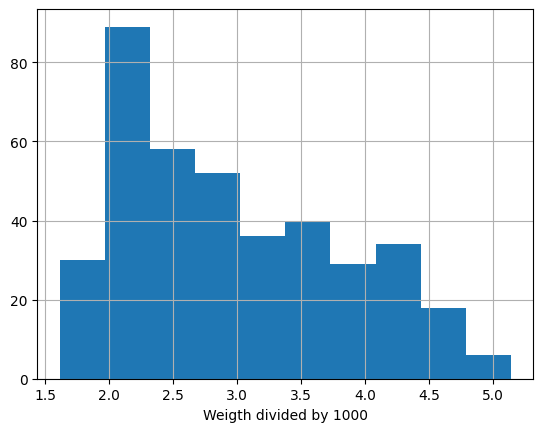

In [14]:
df['Weight1000lb'].hist()
plt.xlabel('Weigth divided by 1000');

Seconds0to60 on heikosti oikealle vino

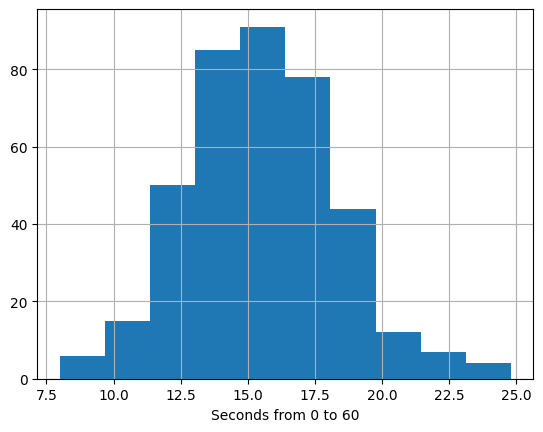

In [15]:
df['Seconds0to60'].hist()
plt.xlabel('Seconds from 0 to 60');

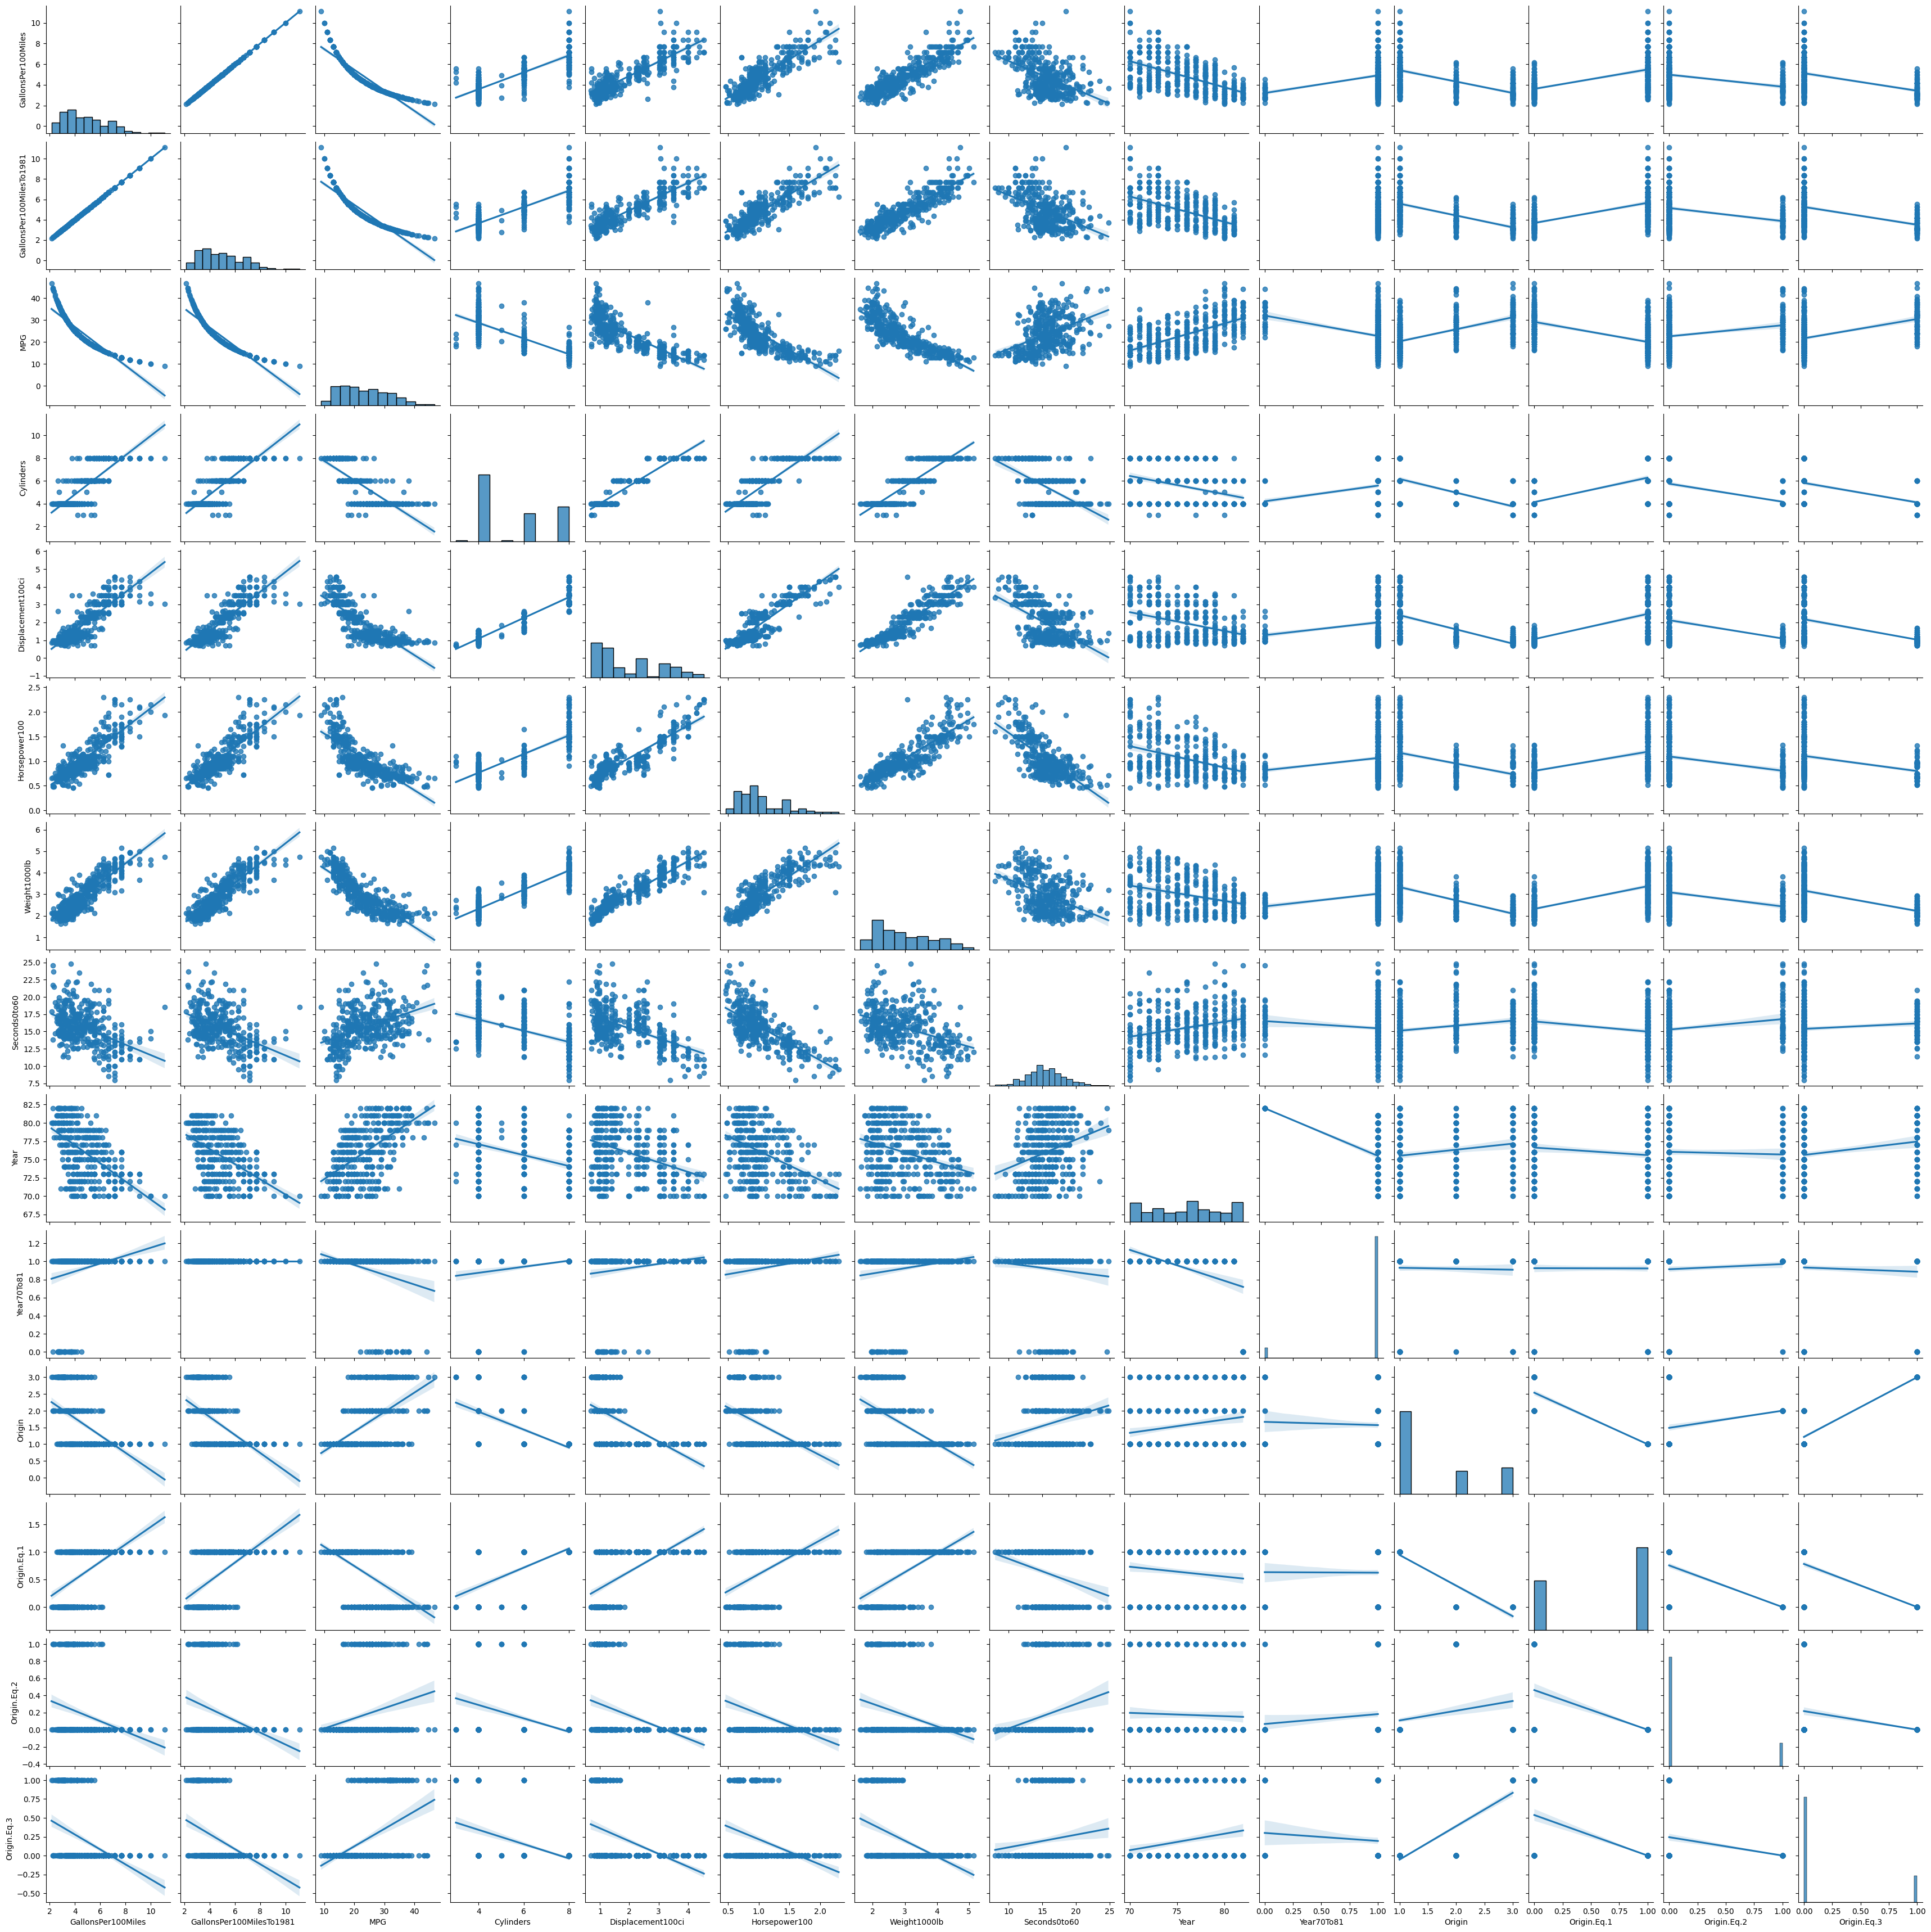

In [16]:
sns.pairplot(df, kind = 'reg');

### Dropping unused columns

In [17]:
df_dropped = df.drop([
    'GallonsPer100MilesTo1981',
    'Year',
    'Year70To81',
    'Origin',
    'Origin.Eq.1',
    'Origin.Eq.2',
    'Origin.Eq.3',
    'Name'
], axis = 1)

In [18]:
df_dropped.describe()

GallonsPer100Miles         MPG   Cylinders  Displacement100ci  \
count          392.000000  392.000000  392.000000          392.00000   
mean             4.782243   23.445918    5.471939            1.94412   
std              1.663944    7.805007    1.705783            1.04644   
min              2.145923    9.000000    3.000000            0.68000   
25%              3.448276   17.000000    4.000000            1.05000   
50%              4.396135   22.750000    4.000000            1.51000   
75%              5.882353   29.000000    8.000000            2.75750   
max             11.111111   46.600000    8.000000            4.55000   

       Horsepower100  Weight1000lb  Seconds0to60  
count     392.000000    392.000000    392.000000  
mean        1.044694      2.977584     15.541327  
std         0.384912      0.849403      2.758864  
min         0.460000      1.613000      8.000000  
25%         0.750000      2.225250     13.775000  
50%         0.935000      2.803500     15.500000  
75%         1.260000      3.614750     17.025000  
max         2.300000      5.140000     24.800000

In [19]:
df_dropped.corr()

GallonsPer100Miles       MPG  Cylinders  \
GallonsPer100Miles            1.000000 -0.935935   0.839385   
MPG                          -0.935935  1.000000  -0.777618   
Cylinders                     0.839385 -0.777618   1.000000   
Displacement100ci             0.866050 -0.805127   0.950823   
Horsepower100                 0.854809 -0.778427   0.842983   
Weight1000lb                  0.885056 -0.832244   0.897527   
Seconds0to60                 -0.456338  0.423329  -0.504683   

                    Displacement100ci  Horsepower100  Weight1000lb  \
GallonsPer100Miles           0.866050       0.854809      0.885056   
MPG                         -0.805127      -0.778427     -0.832244   
Cylinders                    0.950823       0.842983      0.897527   
Displacement100ci            1.000000       0.897257      0.932994   
Horsepower100                0.897257       1.000000      0.864538   
Weight1000lb                 0.932994       0.864538      1.000000   
Seconds0to60                -0.543800      -0.689196     -0.416839   

                    Seconds0to60  
GallonsPer100Miles     -0.456338  
MPG                     0.423329  
Cylinders              -0.504683  
Displacement100ci      -0.543800  
Horsepower100          -0.689196  
Weight1000lb           -0.416839  
Seconds0to60            1.000000

### Correlation heatmap

Heatmapillä saa hyvin havainnollistettua vahvimman positiivisen korrelaatio GallonsPer100Milesin kanssa
- Weight1000lb (0.885)
- Displacement100ci (0.866)
- Horsepower100 (0.855)
- Cylinders (0.839)

Sekä myös negatiivisen:
- MPG (-0.936).

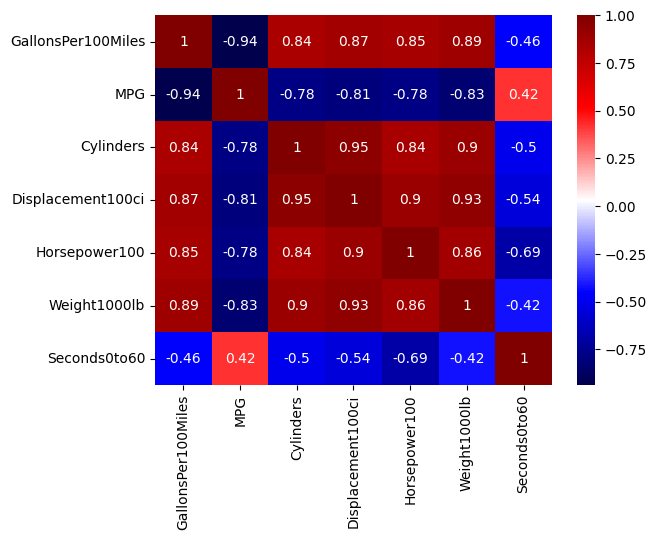

In [20]:
sns.heatmap(df_dropped.corr(), annot=True, cmap="seismic");

## 1.2 A Simple linear regression model

    Yksinkertainen lineaarinen malli X = Weight1000lb, y = GallonsPer100Miles

- Coefficiency/kerroin: 1.734, eli jokainen 1000 lb lisäys auton painoon lisää polttoaineen kulutusta noin 1.73 gallonaa per 100 mailia.

- Intercept/Leikkauspisteen koordinaatti: -0.38, ei ole merkityksellinen auton painojen normaalialueella (ei kuljeta koordinaatistossa negatiivisten puolelle).

- Selitysaste = 0.783, eli paino yksinään selittää ~78% kulutuksen vaihtelusta.


*Huomiot*

    
- Tämä yksinkertainen malli toimii hyvin, mutta se ei huomioi esimerkiksi moottorin kokoa tai kiihtyvyyttä.

- Ennusteet interpolationin sisällä ovat melko luotettavia, extrapolointi aluleella esimerkiksi kun painoa on vain 1 tonni, saadaan epärealistisia arvoja.

In [21]:
X = df_dropped['Weight1000lb'].to_frame()
X.describe()

Weight1000lb
count    392.000000
mean       2.977584
std        0.849403
min        1.613000
25%        2.225250
50%        2.803500
75%        3.614750
max        5.140000

In [22]:
y = df_dropped['GallonsPer100Miles'].to_frame()
y.describe()

GallonsPer100Miles
count          392.000000
mean             4.782243
std              1.663944
min              2.145923
25%              3.448276
50%              4.396135
75%              5.882353
max             11.111111

In [23]:
fuel_weight = LinearRegression().fit(X,y)
print(f"Coefficiency: {fuel_weight.coef_}\n")
print(f"Intercept: {fuel_weight.intercept_}")

Coefficiency: [[1.73378735]]

Intercept: [-0.38025499]


In [24]:
fuel_weight.predict(pd.DataFrame([3])) # ennustus interpolatio alueelta

c:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.82110705]])

In [25]:
fuel_weight.predict(pd.DataFrame([1])) # ennustus extrapolaatio alueelta

c:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.35353236]])

Residuaalit jakautuvat tasaisesti 0 ympärille ilman selkeää kuviota tai trendiä. Hajonta pysyy kohtuullisen vakaana koko ennustealueella.

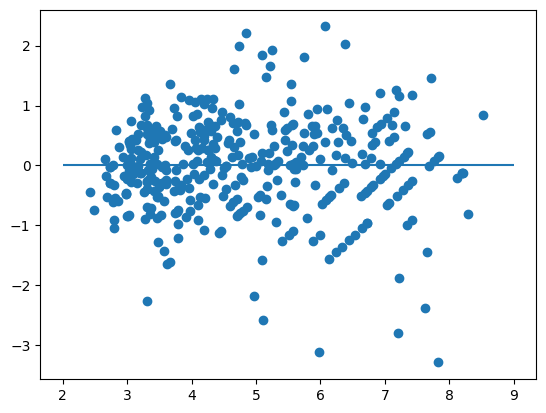

In [26]:
plt.scatter(fuel_weight.predict(X), fuel_weight.predict(X)-y)

plt.hlines(y=0, xmin=2, xmax=9);

In [27]:
fuel_weight.score(X,y)

0.7833240828863839

    Monimuuttujainen malli (kaikki muuttujat)

- X1 = ['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']

- Selitysaste = 0.821, hieman parempi kuin yksinkertainen malli (0.783).

Havainto: Lisättyjen muuttujien vaikutus parantaa tulosta vain marginaalisesti, koska monet muuttujat korreloivat vahvasti keskenään.

    Valikoitu yhdistelmä 1 (Displacement, Horsepower, Weight)

- X2 = ['Displacement100ci', 'Horsepower100', 'Weight1000lb']

- Selitysaste = 0.816, tulos lähes yhtä hyvä kuin kaikki muuttujat(X1).

Havainto: On tehokkaampaa käyttää vain selkeimpiä, fyysisesti merkittäviä ennustajia, tämä vähentää monimuuttujamallin monimutkaisuutta.

    Valikoitu yhdistelmä 2 (Cylinders, Displacement, Seconds0to60)

- X3 = ['Cylinders', 'Displacement100ci', 'Seconds0to60']

- Selitysaste = 0.753 selvästi heikompi kuin muut mallit.

Havainto: Poistamalla paino ja teho, selityskyky heikkenee, mikä osoittaa, että nämä ovat tärkeimpiä muuttujia kulutuksen ennustamisessa.

    Johtopäätös:

Malli ei aina parane lisäämällä muuttujia, jos uudet muuttujat korreloivat voimakkaasti jo käytettyjen kanssa.

Paino, moottorin tilavuus ja teho ovat selvästi tärkeimmät ennustajat.

Kiihtyvyys ja sylinterimäärä voivat olla lisämuuttujia, mutta niiden käyttöhyöty toisiisiinsa vaikutuksen vuoksi (multikollineaarisuus), jää alhaiseksi.

In [28]:
y = df_dropped['GallonsPer100Miles']
X1 = df_dropped[['Cylinders','Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]
X2 = df_dropped[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
X3 = df_dropped[['Cylinders','Displacement100ci','Seconds0to60']]

fuel_all = LinearRegression().fit(X1, y)
fuel_volume_power_weight = LinearRegression().fit(X2, y)
fuel_cylinder_volume_acc = LinearRegression().fit(X3, y)

print(f"Score for Gallons per 100 mile and all the variables is: {fuel_all.score(X1, y)}")
print(f"Score for Gallons per 100 mile and the volume, power, weight is: {fuel_volume_power_weight.score(X2, y)}")
print(f"Score for Gallons per 100 mile and the cylinders, volume, acceleration is: {fuel_cylinder_volume_acc.score(X3, y)}")

Score for Gallons per 100 mile and all the variables is: 0.8207948199718269
Score for Gallons per 100 mile and the volume, power, weight is: 0.8158213878482583
Score for Gallons per 100 mile and the cylinders, volume, acceleration is: 0.7529103569205208


## 1.3 Scatterplot for all variable pairs

### Gallons per 100 miles

    GallonsPer100Miles vs muut muuttujat

- Cylinders: ei suoraa riippuvuutta, mutta trendi selkeä, useampi sylinteri = enemmän kulutusta. 3 ja 5 sylinterisillä taas tehokkuus per sylinteri on pienempi verrattuna parillisiin.

- Displacement100ci ja Horsepower100: myös vahva positiivinen lineaarinen riippuvuus kulutukseen. Suuremmat moottorit ja enemmän tehoja = enemmän kulutusta.

- Weight1000lb: vahva lineaarinen positiivinen korrelaatio. Raskaammat autot kuluttavat enemmän.

- Seconds0to60: heikompi negatiivinen riippuvuus. Pair plotista katsottuna tämä ei ole vertaus kelpoinen asia, liian paljon muita muuttujia jotka selittävät kulutusta ja kiihtyvyyttä. 

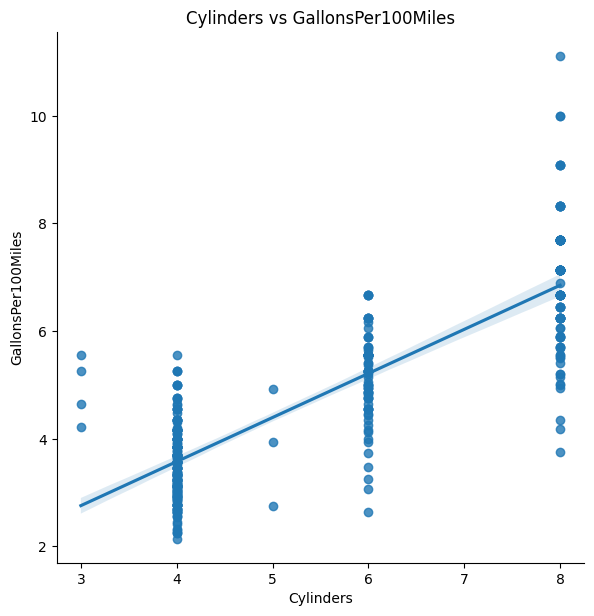

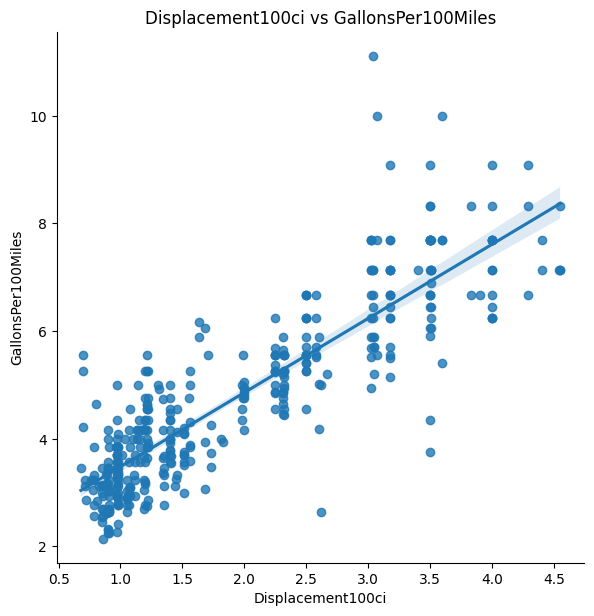

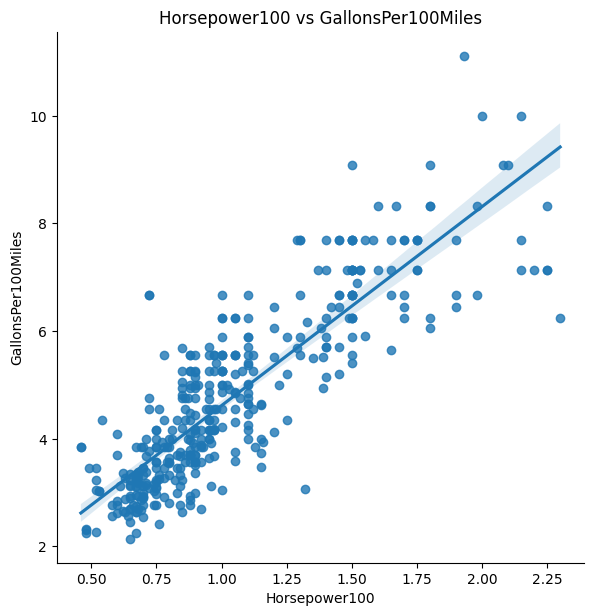

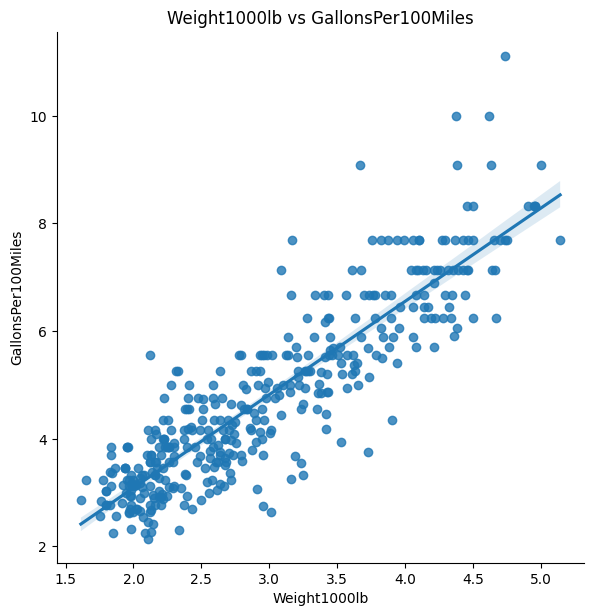

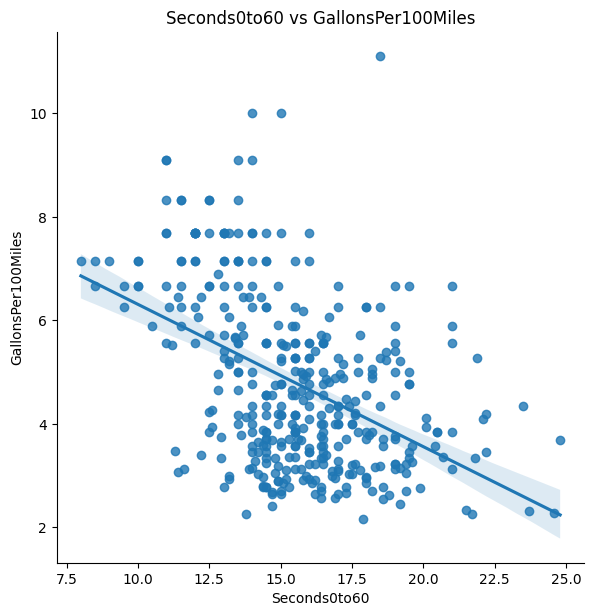

In [29]:
target = 'GallonsPer100Miles'
cols = ['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']

for c in cols:
    sns.pairplot(df_dropped, x_vars=c, y_vars=target, height=6, kind='reg')
    plt.title(f'{c} vs {target}');

### Miles per gallon

    MPG vs muut muuttujat

- Käyttäytyy peilikuvana GallonsPer100Miles: paino, teho, displacement, sylinterit korreloivat negatiivisesti MPG:n kanssa.

- Lineaariset trendit ovat selkeitä, erityisesti Weight1000lb ja Displacement100ci.

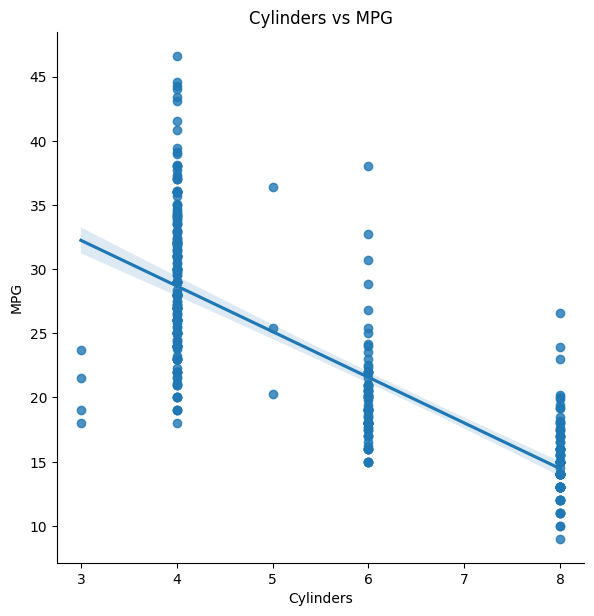

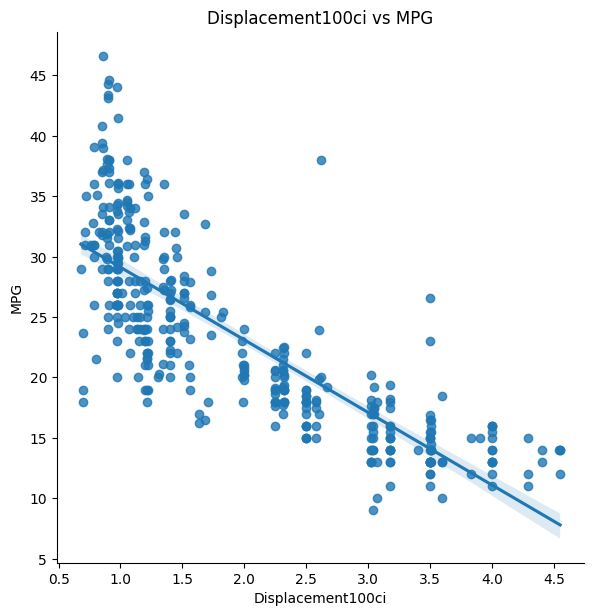

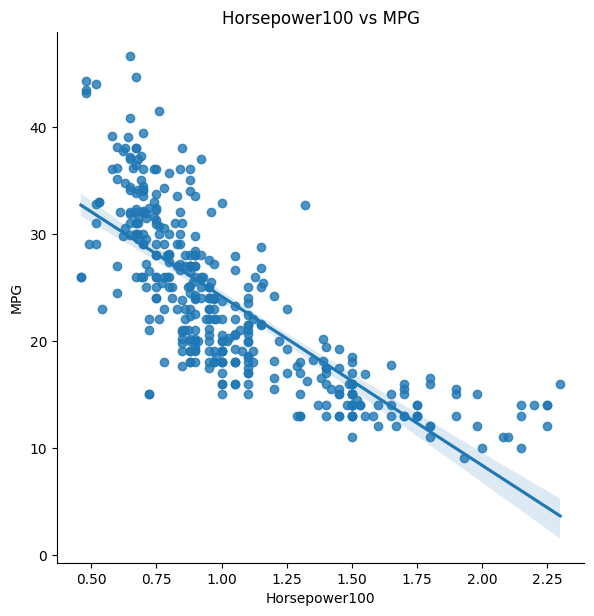

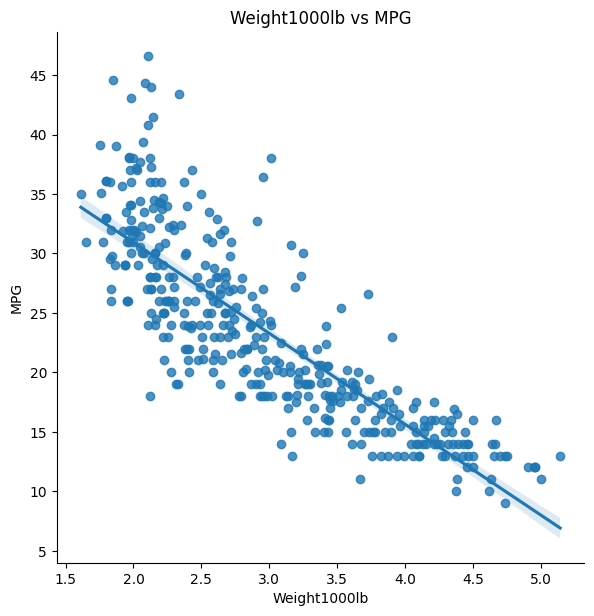

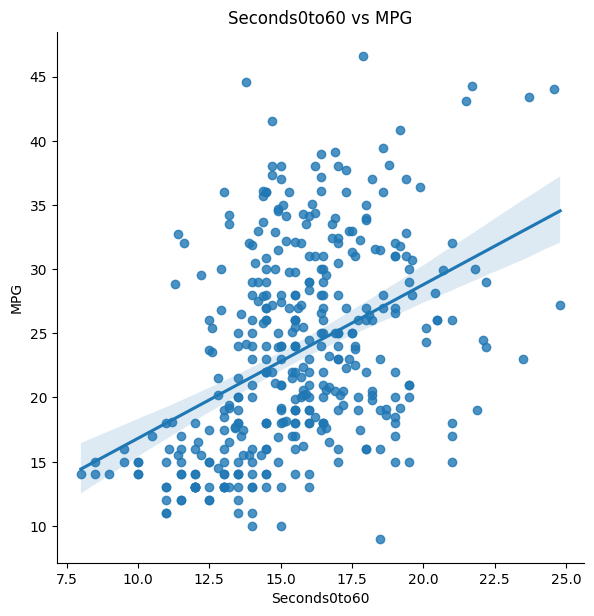

In [30]:
target = 'MPG'
cols = ['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']

for c in cols:
    sns.pairplot(df_dropped, x_vars=c, y_vars=target, height=6, kind='reg')
    plt.title(f'{c} vs {target}');

### Cylinders

    Cylinders vs muut muuttujat

- Displacement100ci ja Horsepower100: lähes lineaarinen riippuvuus.

- Weight1000lb: vahva positiivinen korrelaatio.

- Seconds0to60: negatiivinen korrelaatio. Suurempi sylinterimäärä näyttäisi antavan hitaammman kiihtyvyyden, mutta tämä todennäköisesti johtuu muista tekijöistä kuten suuri paino ja teho.

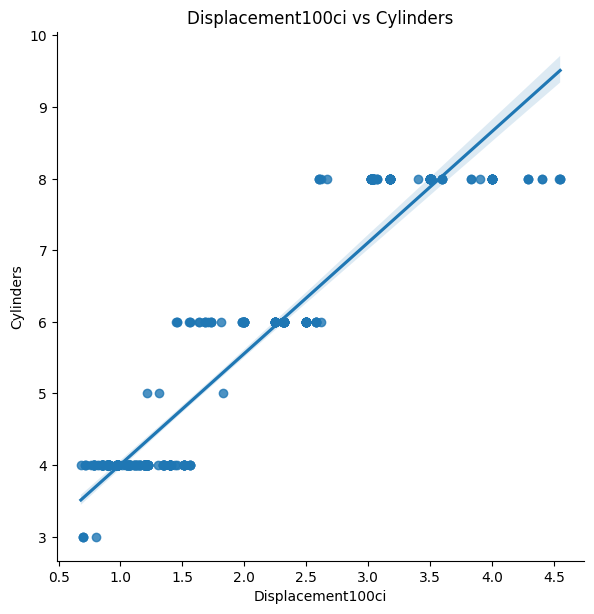

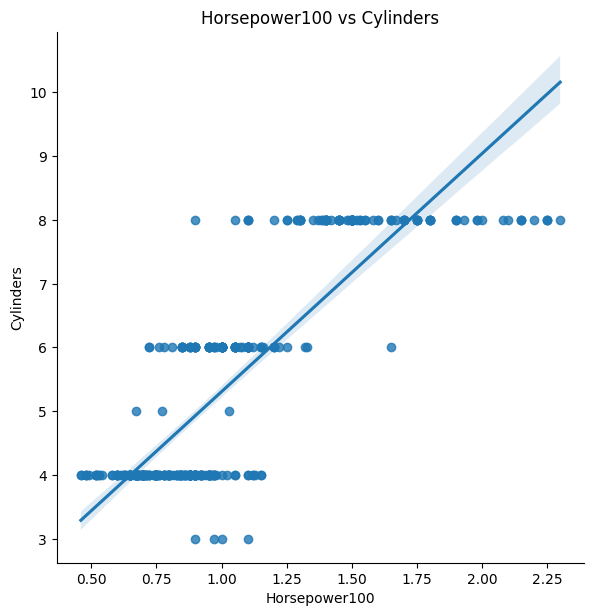

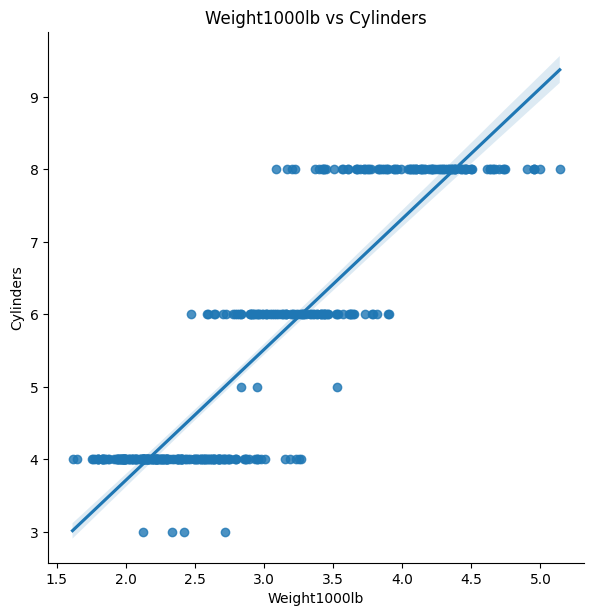

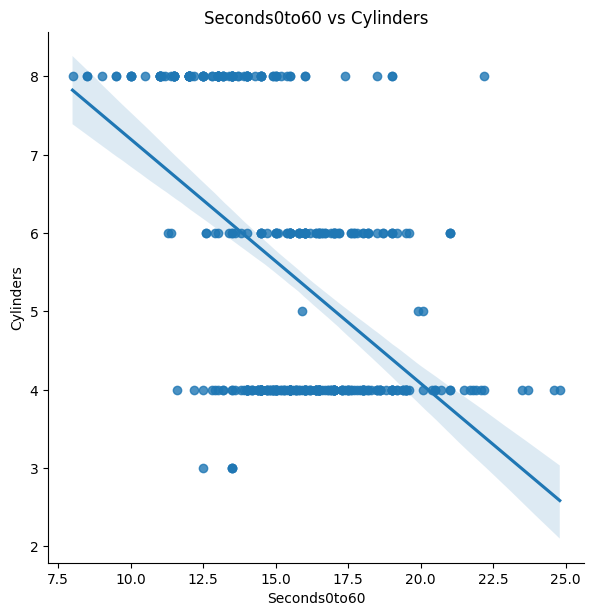

In [31]:
target = 'Cylinders'
cols = ['Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']

for c in cols:
    sns.pairplot(df_dropped, x_vars=c, y_vars=target, height=6, kind='reg')
    plt.title(f'{c} vs {target}');

### Displacement 100 ci

    Displacement100ci vs muut muuttujat

- Horsepower100 ja Weight1000lb - vahva lineaarinen riippuvuus.

- Seconds0to60 - negatiivinen korrelaatio: pairplotti näyttäisi suurempi moottori = nopeampi kiihtyvyys, tämä kuitenkin vaihtelee ja poikkeavia havaintoja näkyy. Tätä pari ei tulisi tutki sillä kiihtyvyyteen vaikuttaa moni muukin asia mm. paino ja teho.

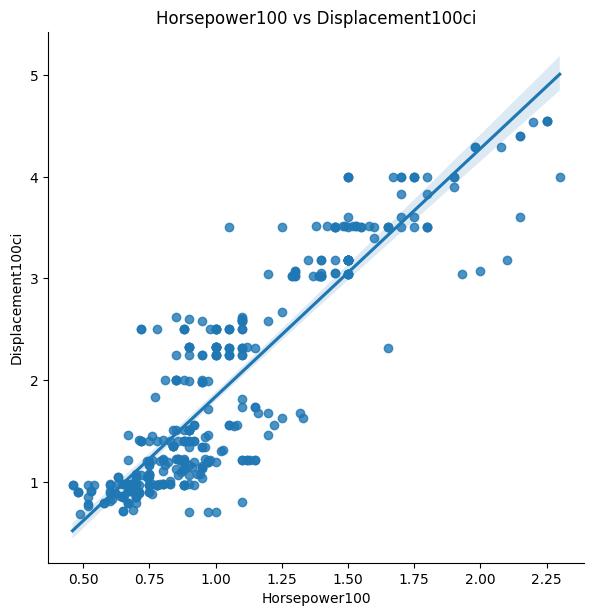

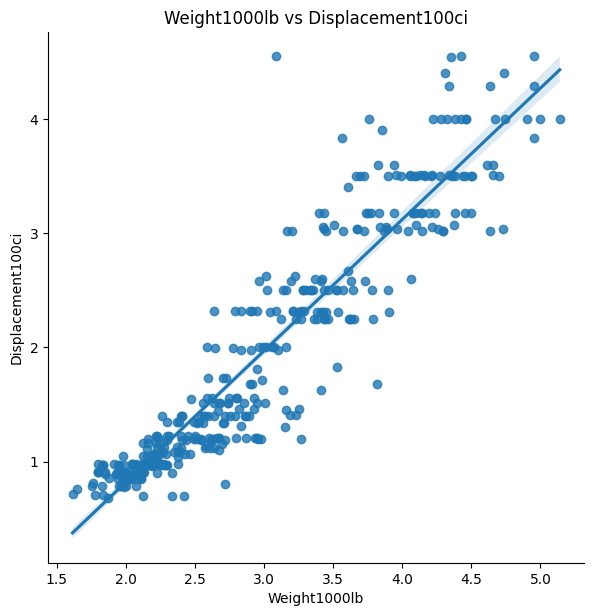

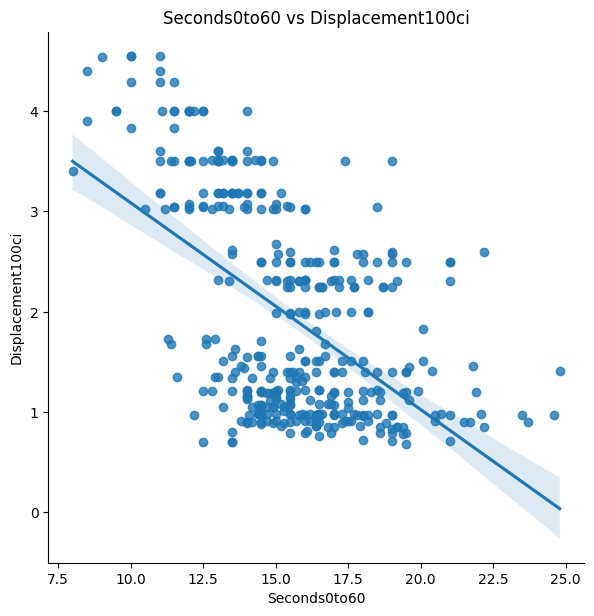

In [32]:
target = 'Displacement100ci'
cols = ['Horsepower100', 'Weight1000lb', 'Seconds0to60']

for c in cols:
    sns.pairplot(df_dropped, x_vars=c, y_vars=target, height=6, kind='reg')
    plt.title(f'{c} vs {target}');

### Horsepower 100

    Horsepower100 vs muut muuttujat

- Weight1000lb - lineaarinen positiivinen korrelaatio.

- Seconds0to60 - negatiivinen korrelaatio, kuten odotettu: teho kasvaa -> kiihtyvyys paranee (vähemmän sekunteja).

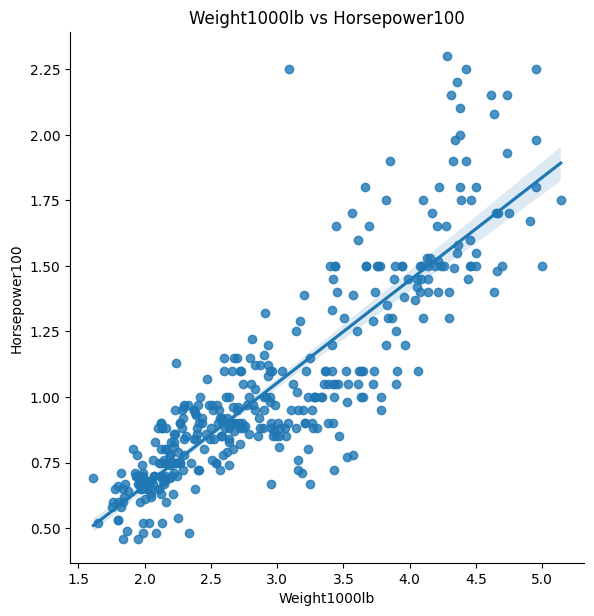

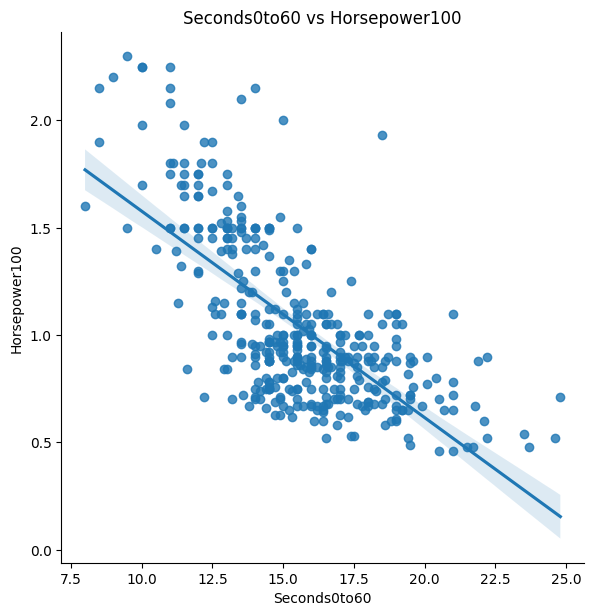

In [33]:
target = 'Horsepower100'
cols = ['Weight1000lb', 'Seconds0to60']

for c in cols:
    sns.pairplot(df_dropped, x_vars=c, y_vars=target, height=6, kind='reg')
    plt.title(f'{c} vs {target}');

### Weight1000lb

    Weight1000lb vs Seconds0to60

Käytännössä kevyemmät autot kiihtyvät nopeammin, raskaammat hitaammin. Pairplotin mukaan selvää yhteyttä ei ole, tämä johtuu muista tekijöistä kyseisessä datassa.

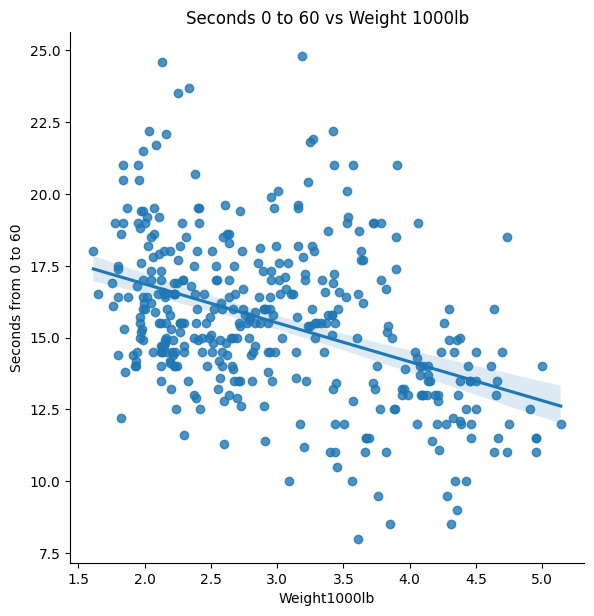

In [34]:
sns.pairplot(df_dropped, x_vars='Weight1000lb', y_vars='Seconds0to60', height=6, kind='reg')
plt.title('Seconds 0 to 60 vs Weight 1000lb')
plt.xlabel('Weight1000lb')
plt.ylabel('Seconds from 0 to 60');

### All-in-one + Summary

    Yhteenveto:

- Selkein trendi: raskaammat, suuremmat ja tehokkaammat autot kuluttavat enemmän polttoainetta.

- Lineaarisia yhteyksiä on helppo havaita, mutta joukossa on myös poikkeavia havaintoja.

- Scatterplotit ja pairplotit tukevat regressiomallin valintaa: Weight1000lb, Displacement100ci ja Horsepower100 ovat tärkeimmät ennustajat.

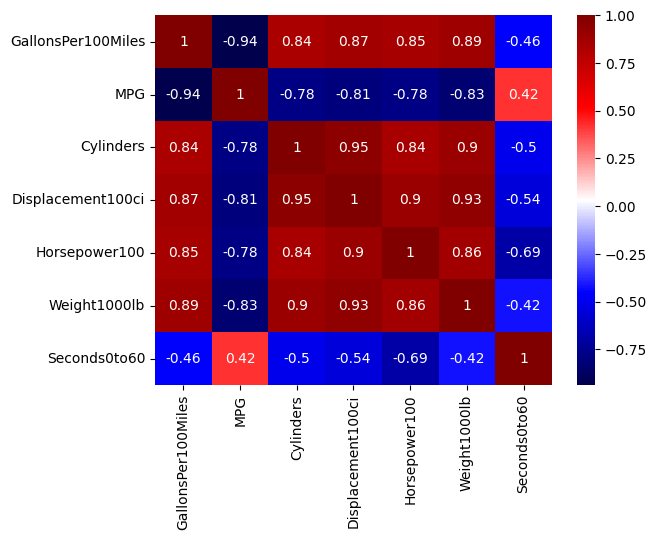

In [35]:
sns.heatmap(df_dropped.corr(), annot=True, cmap="seismic");

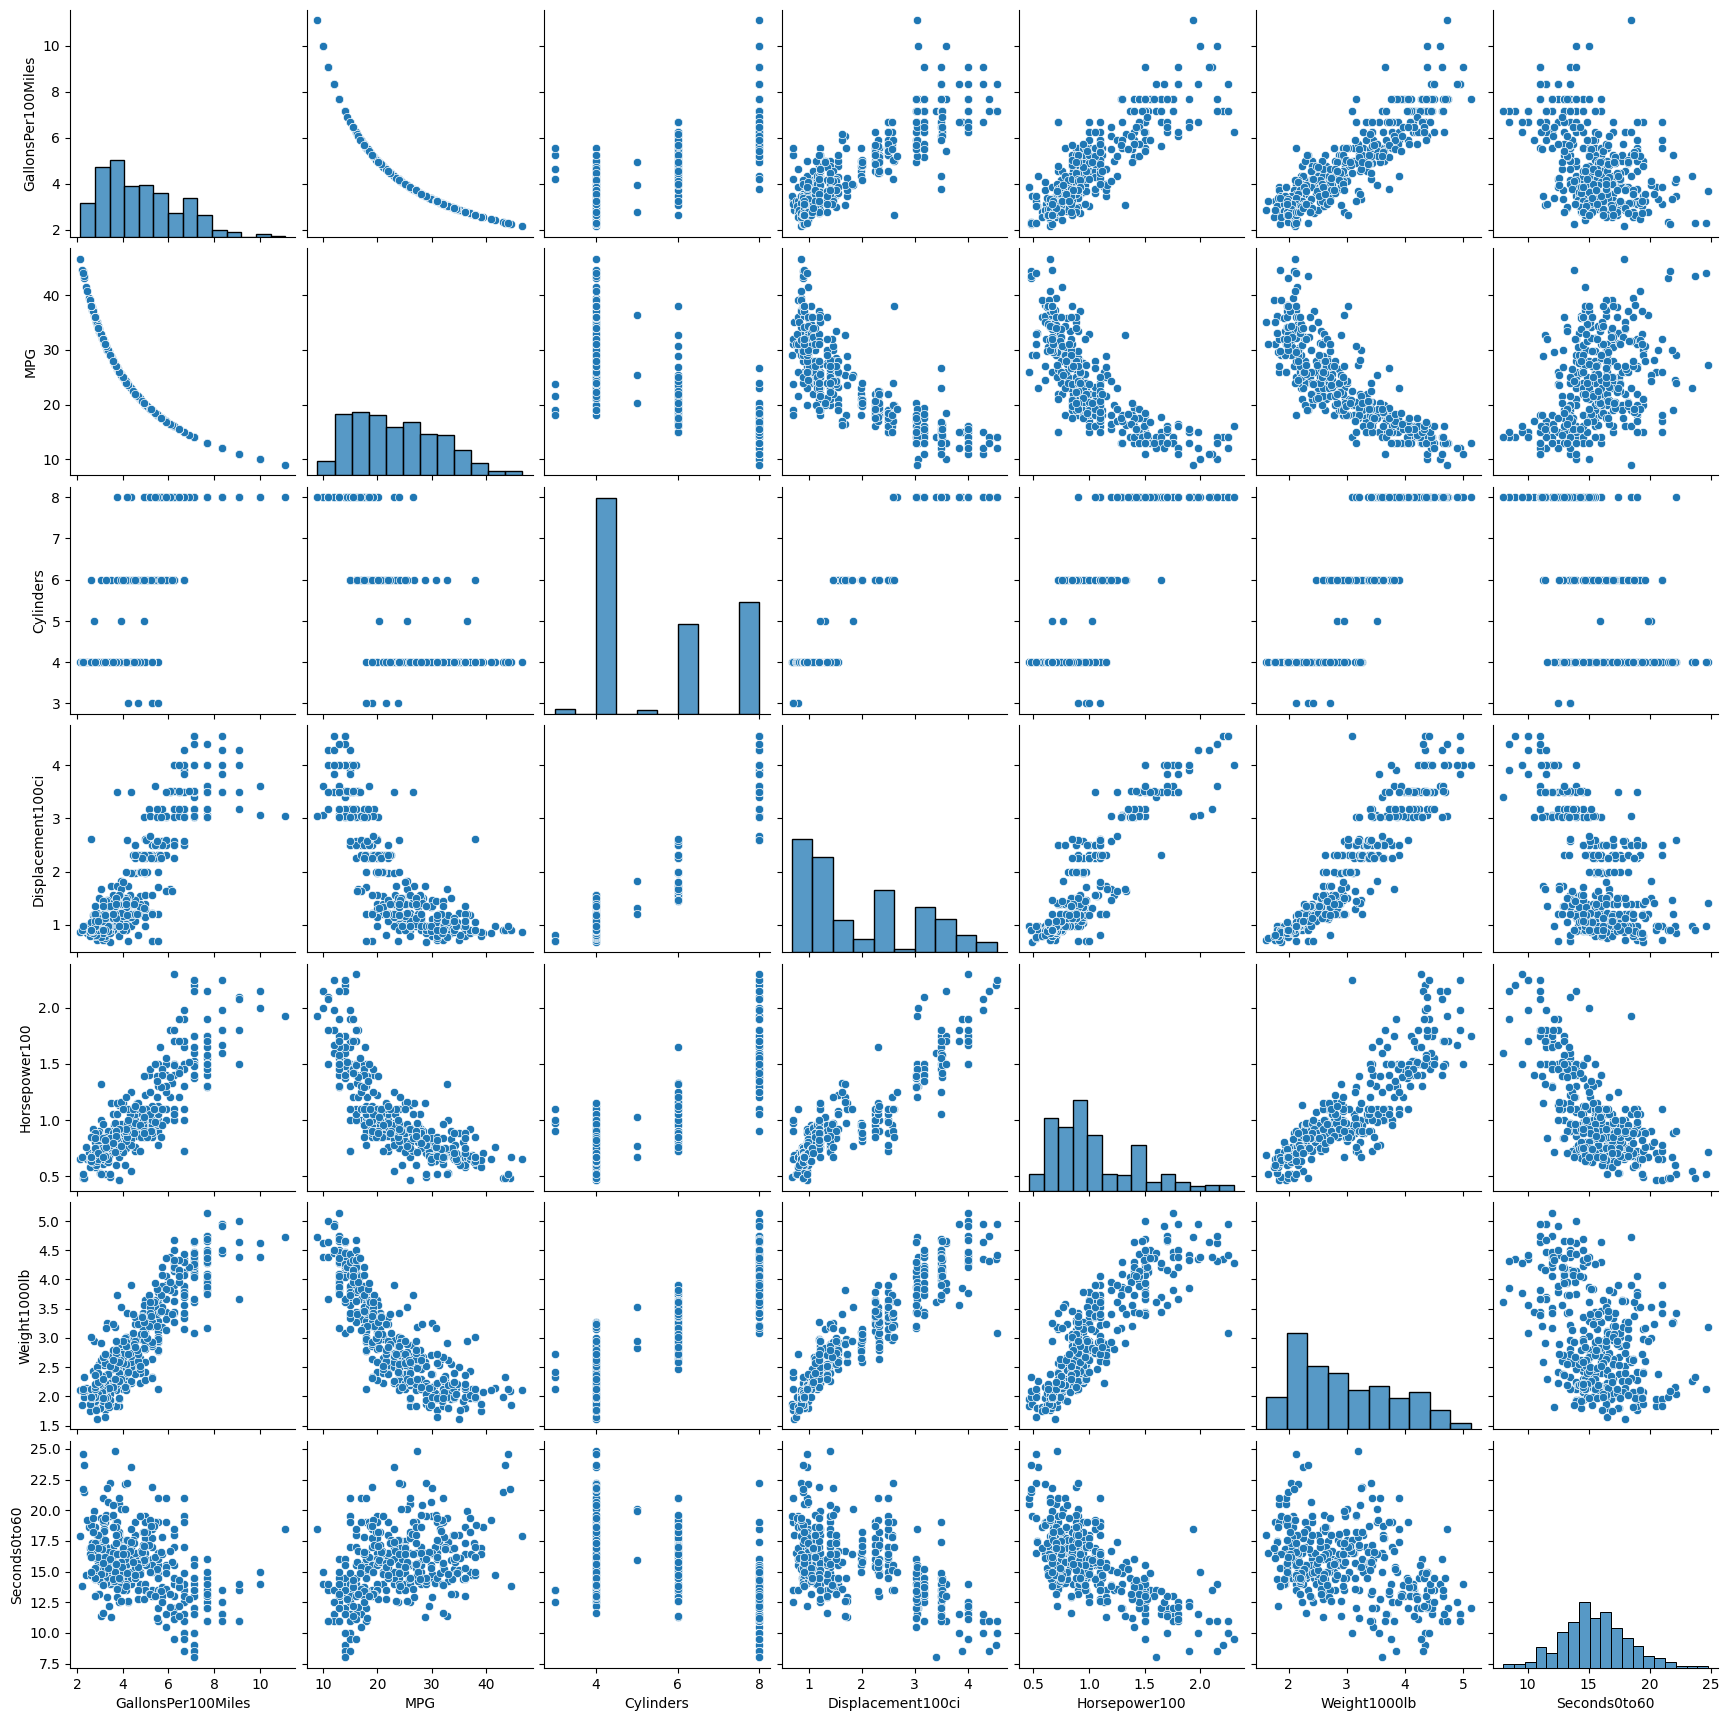

In [36]:
sns.pairplot(df_dropped, diag_kind="hist"); #Tällä saadaan kaikista pareista pairplotti.

## 1.4 Check and interpret various correlation coefficients for your variables

Korrelaatio heatmap ja matriisi paljastavat, että muuttujat eivät ole riippumattomia, vaan heijastavat samaa kokonaisuutta: auton kokoa, moottorin kokoa ja suorituskykyä.
___
___
    Vahvat riippuvuudet
___
___
    
    Cylinders vs. Displacement100ci (0.95)

- Sylinterimäärä käytännössä määrää moottorin tilavuuden. Kyse ei ole tilastollisesta ilmiöstä vaan rakenteellisesta, mekaanisesta suhteesta.
    
___
    
    Displacement100ci vs. Weight1000lb (0.93)

- Suuremmat moottorit asennetaan tyypillisesti suurempiin ja raskaampiin autoihin.

- Tämä ei varsinaisesti johdu siitä, että moottori on yleensä painavin yksittäinen/irrotettava osa 

- Auton massasta yli 70 % tulee rungosta, korista ja muista rakenteista. 

- Syy korrelaatioon on: suuri auto = suuri moottori = suuri kokonaismassa.
___
    
    GallonsPer100Miles vs. MPG (-0.94)

- Käytännössä toistensa käänteisiä. Näitä ei pidä käyttää samassa mallissa redundanssin takia.
___
___
    Tulkittavat vahvat korrelaatiot
___
___

    Cylinders vs. Weight1000lb (0.90)

- Suuremmat autot käyttävät useammin isompia moottoreita = enemmän sylintereitä.
___
    
    Horsepower100 vs. Displacement100ci (0.90)

- Teho kasvaa puristustilavuuden noustessa. Sylintereihin mahtuu enemmän polttoainetta per isku = suurempi potentiaalinen teho.
___
    
    GallonsPer100Miles vs. Weight1000lb (0.89)

- Raskaampi auto kuluttaa enemmän. Massan kasvu lisää liike-energian tarvetta ja vierintävastusta.
___

    GallonsPer100Miles vs. Displacement100ci (0.87)

- Suurempi moottori kuluttaa enemmän. Massa ja puristustilavuus nostavat kulutusta.
___

    GallonsPer100Miles vs. Horsepower100 (0.85)

- Tehokkaammat moottorit kuluttavat enemmän, odotettu seuraus displacement vs. horsepower ja displacement vs. weight -riippuvuuksista.
___
___
    Kohtalaiset korrelaatiot
___
___

    Seconds0to60 vs. Horsepower100 (-0.69)

- Tehokkaampi moottori = nopeampi kiihtyvyys.
___

    Seconds0to60 vs. Displacement100ci (-0.54)

- Suurempi moottori tuottaa enemmän vääntöä = nopeampi kiihtyvyys.
___

    Seconds0to60 vs. Cylinders (-0.50)

- Enemmän sylintereitä = yleensä enemmän tehoa = parempi kiihtyvyys.
___
___
    Heikot korrelaatiot
___
___
    
    Seconds0to60 vs. Weight1000lb (-0.42)

- Painavampi auto kiihtyy hitaammin, mutta oletettua heikompi korrelaatio. 
    
Mahdollisia syitä:

 - teho–painosuhde vaihtelee suuresti

 - välitykset ja vaihteistot eivät ole vakiot

 - datasetti koostuu autoista 1970-1982, suuri teknologinen vaihtelu
___
___
    Havainnot mallin rakennusta varten
___
___

Käytetään riippuvaisena muuttujana GallonsPer100Miles. MPG sisältää puuttuvia arvoja ja on redundantti GallonsPer100Milesin kanssa.

Cylinders, Displacement, Horsepower ja Weight ovat vahvasti multikollineaarisia

- Sama fysikaalinen ilmiö näkyy monella muuttujalla.

- Useamman samankaltaisen muuttujan käyttö kasvattaa mallin varianssia eikä paranna tulosta.

Seconds0to60 tuo lisää tietoa

- Korrelaatiot ovat matalammat mutta ei redundantteja

- Voidaan käyttää erottamaan samankokoisia autoja toisistaan.

GallonsPer100Miles       MPG  Cylinders  \
GallonsPer100Miles            1.000000 -0.935935   0.839385   
MPG                          -0.935935  1.000000  -0.777618   
Cylinders                     0.839385 -0.777618   1.000000   
Displacement100ci             0.866050 -0.805127   0.950823   
Horsepower100                 0.854809 -0.778427   0.842983   
Weight1000lb                  0.885056 -0.832244   0.897527   
Seconds0to60                 -0.456338  0.423329  -0.504683   

                    Displacement100ci  Horsepower100  Weight1000lb  \
GallonsPer100Miles           0.866050       0.854809      0.885056   
MPG                         -0.805127      -0.778427     -0.832244   
Cylinders                    0.950823       0.842983      0.897527   
Displacement100ci            1.000000       0.897257      0.932994   
Horsepower100                0.897257       1.000000      0.864538   
Weight1000lb                 0.932994       0.864538      1.000000   
Seconds0to60                -0.543800      -0.689196     -0.416839   

                    Seconds0to60  
GallonsPer100Miles     -0.456338  
MPG                     0.423329  
Cylinders              -0.504683  
Displacement100ci      -0.543800  
Horsepower100          -0.689196  
Weight1000lb           -0.416839  
Seconds0to60            1.000000

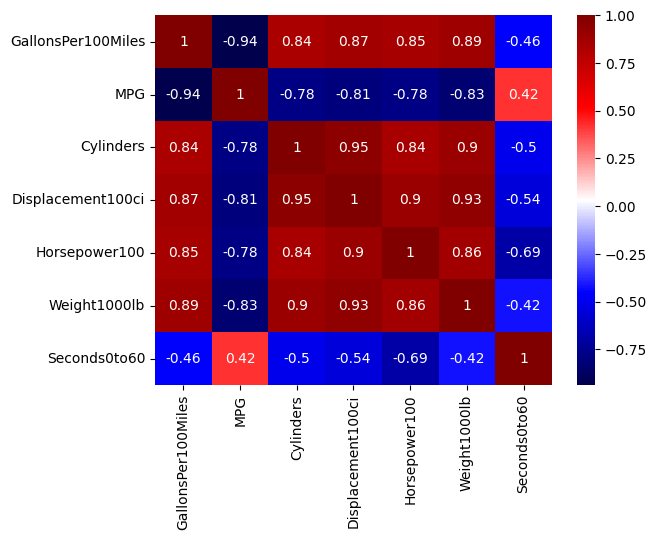

In [38]:
sns.heatmap(df_dropped.corr(), annot=True, cmap="seismic")
df_dropped.corr()

# Part 2

## 2.1 Best triplet of independent variables for the (multivariate) linear regression model

In [39]:
y = df_dropped['GallonsPer100Miles']
X = df_dropped.drop(['GallonsPer100Miles', 'MPG'], axis=1)

scores = []

for combo in combinations(X.columns, 3):
    model = LinearRegression()
    model.fit(X[list(combo)], y)
    score = model.score(X[list(combo)], y)
    scores.append((combo, score))

scores_sorted = sorted(scores, key=lambda x: x[1], reverse=True)

best_combo, best_score = scores_sorted[0]

print("Best 3: ", best_combo)
print(f"coefficiency score: {best_score}\n")

for combo, score in scores_sorted:
    print(f"{combo}: {score:.4f}\n")

# Best 3:  ('MPG', 'Cylinders', 'Displacement100ci')
# coefficiency score:  0.9125807304873502
# Tästä syystä pitää myös se MPG pudottaa.

Best 3:  ('Cylinders', 'Horsepower100', 'Weight1000lb')
coefficiency score: 0.8176921365228299

('Cylinders', 'Horsepower100', 'Weight1000lb'): 0.8177

('Horsepower100', 'Weight1000lb', 'Seconds0to60'): 0.8173

('Displacement100ci', 'Horsepower100', 'Weight1000lb'): 0.8158

('Cylinders', 'Horsepower100', 'Seconds0to60'): 0.7999

('Displacement100ci', 'Horsepower100', 'Seconds0to60'): 0.7992

('Displacement100ci', 'Weight1000lb', 'Seconds0to60'): 0.7983

('Cylinders', 'Weight1000lb', 'Seconds0to60'): 0.7982

('Cylinders', 'Displacement100ci', 'Weight1000lb'): 0.7969

('Cylinders', 'Displacement100ci', 'Horsepower100'): 0.7852

('Cylinders', 'Displacement100ci', 'Seconds0to60'): 0.7529



    Tutkiessa kaikkia mahdollisia kolmen muuttujan yhdistelmiä paras yhdistelmä oli:

- 'Cylinders', 'Horsepower100', 'Weight1000lb'
- Arvolla 0.8177

Tämä tarkoittaa, että malli selittää noin 81,8 % polttoaineenkulutuksen vaihtelusta.

Kolmen muuttujan valinta perustuu vahvaan tilastolliseen yhteyteen kulutuksen kanssa, mutta myös siihen, että nämä muuttujat yhdessä selittävät suurimman osan vaihtelusta.

___

    Toisiksi paras yhdistelmä oli:

- 'Horsepower100', 'Weight1000lb', 'Seconds0to60'
- Arvolla 0.8173

Vaikka selitysaste on hieman pienempi (0.8173 vs. 0.8177), tämä yhdistelmä tuo malliin ei-redundanttia informaatiota, sillä Seconds0to60 ei ole yhtä vahvasti korreloitunut muiden muuttujien kanssa.

Tämä voi olla hyödyllistä ennustettaessa uusia autoja, joissa sylinterimäärä ei välttämättä korreloi suorituskyvyn kanssa samalla tavalla kuin vanhoissa datasetin autoissa.
___

    Yhteenveto

Parhaan yhdistelmän valinta perustuu selitysasteeseen, mutta molemmat mallit heijastavat fysiikan ja suorituskyvyn välistä logiikkaa: suurempi moottori ja teho lisäävät kulutusta, ja kiihdytysaika antaa lisätietoa auton suorituskyvystä.

Käytetään siis: 'Cylinders', 'Horsepower100', 'Weight1000lb'

## 2.2 Error terms plot

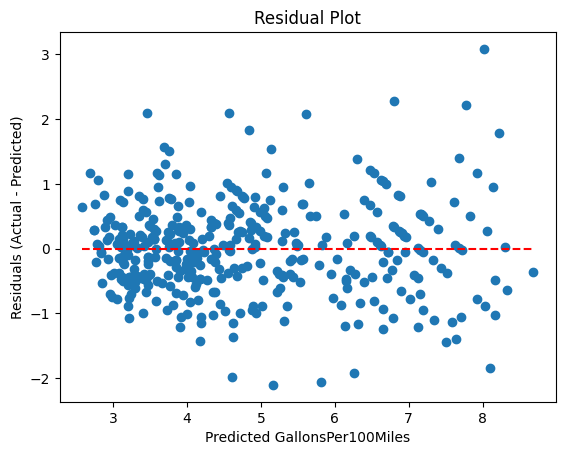

In [ ]:
y = df_dropped['GallonsPer100Miles']
X_best = df_dropped[['Cylinders', 'Horsepower100', 'Weight1000lb']]

best_model = LinearRegression().fit(X_best, y)

y_pred = best_model.predict(X_best)

residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.xlabel("Predicted GallonsPer100Miles")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot");

    Scatterplot

y_pred vs. residuaalit:

Residuaalit ovat pääosin satunnaisesti jakautuneet nollan ylä- ja alapuolelle, malli ei siis näytä systemaattisia virheitä, eli lineaarisuus on kohtuullinen.

Ei havaittavissa kuviota kuten kaarevuutta mikä tarkoittaa, että lineaarinen malli sopii datalle hyvin.

Residuaalit pysyvät suurimmaksi osaksi +- 1.5 gallonan sisällä, mutta yksittäisiä poikkeavia havaintoja on: max ~3, min ~ -2.

Skweness: 0.37162997551730664
Kurtosis: 1.4034164932695106


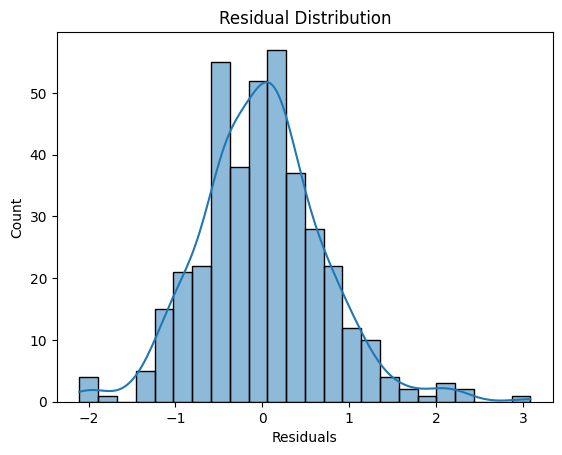

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals");
print(f"Skweness: {residuals.skew()}")
print(f"Kurtosis: {residuals.kurt()}")

    Histogrammi

- Residuaalit keskittyvät hyvin nollan ympärille

- KDE:n huippu ~0.05, suurin osa ennusteista on lähellä todellisia arvoja.

- Residuaalien jakauma on likimain symmetrinen, mutta hieman oikealle vinoutunut, mikä voi johtua erityisen suurista tai tehokkaista autoista datasetissä.

- Tämä viittaa siihen, että malli toimii keskimääräisillä autoilla oikein, mutta ääriarvoissa virheet kasvavat.

    Yhteenveto

Malli selittää hyvin (~82 % vaihtelusta kolmella muuttujalla) ja residuaalit eivät osoita systemaattista virherakennetta.

Poikkeamat ovat suhteellisen pieniä, mutta datasetissä on yksittäisiä outliereita, jotka voivat vaikuttaa ennusteisiin.

Lineaarisen mallin olettamat (residuaalit satunnaisia, symmetrisiä, keskitetty nollan ympärille) näyttävät olevan suurin piirtein voimassa.

Skewness ~ 0.37, residuaalit ovat heikosti oikealle vinoja, eli jakauman huippu on hieman vasemmalla ja hännät venyvät oikealle.

Kurtosis ~ 1.40, jakauma on matalahuippuinen normaalijakaumaan verrattuna (normaali kurtosis = 3). Tämä tarkoittaa, että residuaalit ovat hieman tasaisempia ja vähemmän “teräviä” huippuja kuin normaalijakauma.

## 2.3 Predictions using the best model

In [ ]:
new_cars = pd.DataFrame(
    {'Cylinders': [3, 4, 5, 6, 7, 8],
     'Horsepower100': [0.7, 1.1, 1.8, 2.0, 2.2, 2.3],
     'Weight1000lb': [1.7, 1.9, 2.2, 3.5, 4.5, 5.1]
    })

predictions = best_model.predict(new_cars)
new_cars['Predicted_GallonsPer100Miles'] = predictions

print(new_cars)

   Cylinders  Horsepower100  Weight1000lb  Predicted_GallonsPer100Miles
0          3            0.7           1.7                      2.764947
1          4            1.1           1.9                      3.635825
2          5            1.8           2.2                      5.023169
3          6            2.0           3.5                      6.687721
4          7            2.2           4.5                      8.059650
5          8            2.3           5.1                      8.901770


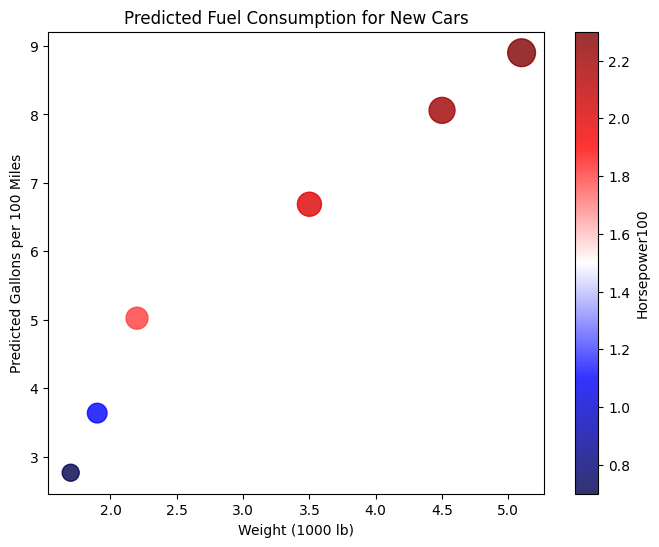

In [ ]:
# x-akseli = Weight1000lb, y-akseli = Predicted Gallons, pisteenkoko = sylinterien määrä, väri = hevosvoimat
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    new_cars['Weight1000lb'],
    new_cars['Predicted_GallonsPer100Miles'],
    c=new_cars['Horsepower100'],
    s=new_cars['Cylinders']*50,
    cmap='seismic',
    alpha=0.8
)

plt.colorbar(scatter, label='Horsepower100')
plt.xlabel('Weight (1000 lb)')
plt.ylabel('Predicted Gallons per 100 Miles')
plt.title('Predicted Fuel Consumption for New Cars');


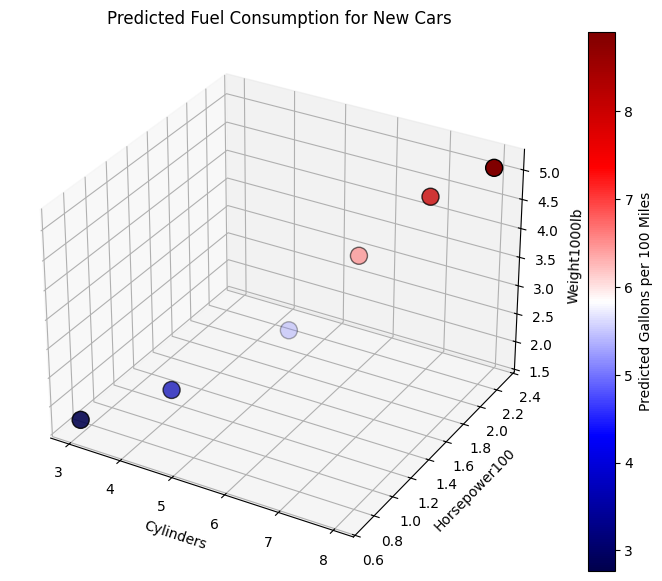

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x = new_cars['Cylinders']
y = new_cars['Horsepower100']
z = new_cars['Weight1000lb']
c = new_cars['Predicted_GallonsPer100Miles']

# Scatter plot
sc = ax.scatter(x, y, z, c=c, cmap='seismic', edgecolors='k', s=150)
plt.colorbar(sc, label='Predicted Gallons per 100 Miles')

ax.set_xlabel('Cylinders')
ax.set_ylabel('Horsepower100')
ax.set_zlabel('Weight1000lb')
ax.set_title('Predicted Fuel Consumption for New Cars');

Parhaalla mallilla ('Cylinders', 'Horsepower100', 'Weight1000lb') tehtiin ennusteita polttoaineenkulutukselle.
___
    
    Arvot:

- 'Cylinders': [3, 4, 5, 6, 7, 8]
- 'Horsepower100': [0.7, 1.1, 1.8, 2.0, 2.2, 2.3]
- 'Weight1000lb': [1.7, 1.9, 2.2, 3.5, 4.5, 5.1]
___
    
    Mallin ennusteet:

Predicted_GallonsPer100Miles
- 2.765
- 3.636
- 5.023
- 6.688
- 8.060
- 8.902
___

    Yhteenveto:

- Ennusteet noudattavat odotettua suhdetta: suurempi moottori ja painavampi auto kuluttavat enemmän polttoainetta.  

- 3D-plotti havainnollistaa, kuinka kolme riippumatonta muuttujaa yhdessä selittävät polttoaineenkulutuksen vaihtelua.  


## 2.4 Interpolation and Extrapolation

In [ ]:
df_dropped.describe()

GallonsPer100Miles         MPG   Cylinders  Displacement100ci  \
count          392.000000  392.000000  392.000000          392.00000   
mean             4.782243   23.445918    5.471939            1.94412   
std              1.663944    7.805007    1.705783            1.04644   
min              2.145923    9.000000    3.000000            0.68000   
25%              3.448276   17.000000    4.000000            1.05000   
50%              4.396135   22.750000    4.000000            1.51000   
75%              5.882353   29.000000    8.000000            2.75750   
max             11.111111   46.600000    8.000000            4.55000   

       Horsepower100  Weight1000lb  Seconds0to60  
count     392.000000    392.000000    392.000000  
mean        1.044694      2.977584     15.541327  
std         0.384912      0.849403      2.758864  
min         0.460000      1.613000      8.000000  
25%         0.750000      2.225250     13.775000  
50%         0.935000      2.803500     15.500000  
75%         1.260000      3.614750     17.025000  
max         2.300000      5.140000     24.800000

Cylinders
- min = 3
- max = 8

Horsepower100
- min = 0.46
- max = 2.30

Weight1000lb
- min = 1.613
- max = 5.140

### Interpolation

In [ ]:
interp_cars = pd.DataFrame(
    {
    'Cylinders': [3, 4, 4, 5, 6, 6, 7, 8],
    'Horsepower100': [0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2.0, 2.1],  # datasetin skaalaus
    'Weight1000lb': [1.7, 2.0, 2.2, 2.4, 3.0, 3.3, 4.0, 4.5]
    })

interp_pred = best_model.predict(interp_cars)
interp_cars['Predicted_GallonsPer100Miles'] = interp_pred

print("Interpolation predictions:")
print(interp_cars)


Interpolation predictions:
   Cylinders  Horsepower100  Weight1000lb  Predicted_GallonsPer100Miles
0          3            0.7           1.7                      2.764947
1          4            0.9           2.0                      3.454084
2          4            1.1           2.2                      3.928450
3          5            1.3           2.4                      4.520045
4          6            1.5           3.0                      5.501807
5          6            1.7           3.3                      6.073715
6          7            2.0           4.0                      7.292659
7          8            2.1           4.5                      8.037239


    Yhteenveto & tulkinta:

- Ennusteet käyttäytyvät loogisesti datasetin sisällä

    - Ennusteet nousevat tasaisesti, kun sylinterien määrä, hevosvoimat ja paino kasvavat.

    - Esimerkiksi pienin auto (3 sylinteriä, 70 hp/, 1.7 tonnia) kuluttaa ~2.76 gal/100 mailia, kun taas suurin interpoloitu auto (8 sylinteriä, 210 hp, 4.5 tonnia) kuluttaa ~8.04 gal/100 mailia.

- Malli toimii odotetusti interpolaatioalueella

    - Kaikki arvot ovat datasetin rajojen sisällä, joten mallin lineaarinen oletus pätee.

    - Ennusteet muuttuvat tasaisesti ilman äkillisiä hyppyjä, mikä kertoo, että malli ei tuota virheellisiä arvoja alueella, jota se on "nähnyt" koulutuksessa.

- Fyysinen logiikka vahvistaa mallin luotettavuuden
    
    - Suurempi moottori ja painavampi auto kuluttavat enemmän polttoainetta, eli ennusteet nousevat loogisesti.

    - Malli yhdistää kolme muuttujaa, jotka kaikki vaikuttavat kulutukseen eri mekanismein: sylinterien määrä (Cylinders), teho (Horsepower100) ja auton massa (Weight1000lb).

- Mallin vahvuus ja rajoitus

    - Vahvuus: Ennusteet interpolaatioalueella ovat luotettavia ja lineaarisia.

    - Rajoitus: Tämä ei vielä kerro mallin käyttäytymisestä ekstrapoloinnissa, jolloin muuttujat menevät datasetin ulkopuolelle.

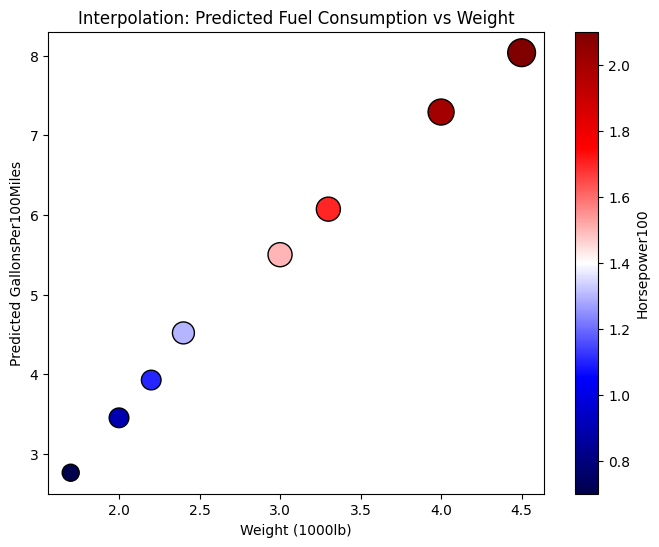

In [ ]:
# x-akseli = autojen paino, y-akseli = ennuste, väri = hevosvoimat, pallon koko = sylinterimäärä
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    interp_cars['Weight1000lb'],
    interp_cars['Predicted_GallonsPer100Miles'],
    c=interp_cars['Horsepower100'],
    s=interp_cars['Cylinders']*50,
    cmap='seismic',
    edgecolor='k'
)

plt.xlabel("Weight (1000lb)")
plt.ylabel("Predicted GallonsPer100Miles")
plt.title("Interpolation: Predicted Fuel Consumption vs Weight")
cbar = plt.colorbar(scatter)
cbar.set_label("Horsepower100");


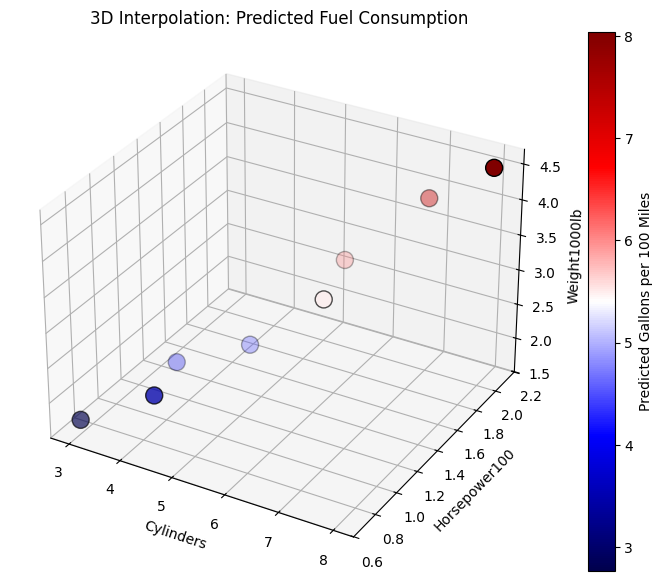

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x = interp_cars['Cylinders']
y = interp_cars['Horsepower100']
z = interp_cars['Weight1000lb']
c = interp_cars['Predicted_GallonsPer100Miles']

sc = ax.scatter(x, y, z, c=c, cmap='seismic', edgecolors='k', s=150)

plt.colorbar(sc, label='Predicted Gallons per 100 Miles')

ax.set_xlabel('Cylinders')
ax.set_ylabel('Horsepower100')
ax.set_zlabel('Weight1000lb')
ax.set_title('3D Interpolation: Predicted Fuel Consumption');


### Extrapolation

In [ ]:
extra_cars = pd.DataFrame(
    {
    'Cylinders': [1, 2, 9, 10, 11, 12],
    'Horsepower100': [0.3, 0.5, 2.4, 2.6, 2.8, 3.0],
    'Weight1000lb': [1.2, 1.6, 5.5, 5.8, 6.0, 6.3]
    })

extra_pred = best_model.predict(extra_cars)
extra_cars['Predicted_GallonsPer100Miles'] = extra_pred

print("Extrapolation predictions:")
print(extra_cars)


Extrapolation predictions:
   Cylinders  Horsepower100  Weight1000lb  Predicted_GallonsPer100Miles
0          1            0.3           1.2                      1.484213
1          2            0.5           1.6                      2.270892
2          9            2.4           5.5                      9.548808
3         10            2.6           5.8                     10.237946
4         11            2.8           6.0                     10.829541
5         12            3.0           6.3                     11.518679


- Ennusteet jatkuvat lineaarisesti datasetin ulkopuolella

    - Malli ennustaa kasvavaa polttoaineenkulutusta, kun muuttujat ylittävät alkuperäisen datasetin arvot.

    - Esimerkiksi pienin auto (1 sylinteri, 30 hp, 1.2 tonnia) ennustetaan kuluttavan ~1.48 gal/100 mailia, ja suurin auto (12 sylinteriä, 300 hp, 6.3 tonnia) ~11.52 gal/100 mailia.

- Mallin luotettavuus heikkenee ekstrapoloinnissa

    - Ennusteet perustuvat lineaariseen malliin, joka ei tiedä, miten todellisuudessa käyttäytyisi autoja, joiden ominaisuudet poikkeavat koulutusdataan nähden.

    - Esimerkiksi 9-12 sylinteriset autot tai 1-2 sylinteriset autot eivät ole datasetissä, joten mallin ennusteet voivat olla epärealistisia.

- Fyysinen logiikka vs. malli

    - Ennusteet noudattavat lineaarista trendiä: suurempi moottori + teho + paino = suurempi kulutus.

    - Tämä on edelleen loogista, mutta todellisuudessa autojen teknologia (esim. hybridit, turbo) voisi rikkoa lineaarisen mallin ennusteen.

- Yhteenveto

    - Ekstrapolointi näyttää, että malli tuottaa arvoja, jotka noudattavat samaa trendiä kuin datasetissä.

    - Kuitenkin mallin luotettavuus ekstrapoloinnissa on epävarma: arvoja kannattaa tulkita varauksella ja mieluiten pysyä datasetin sisäisellä alueella.

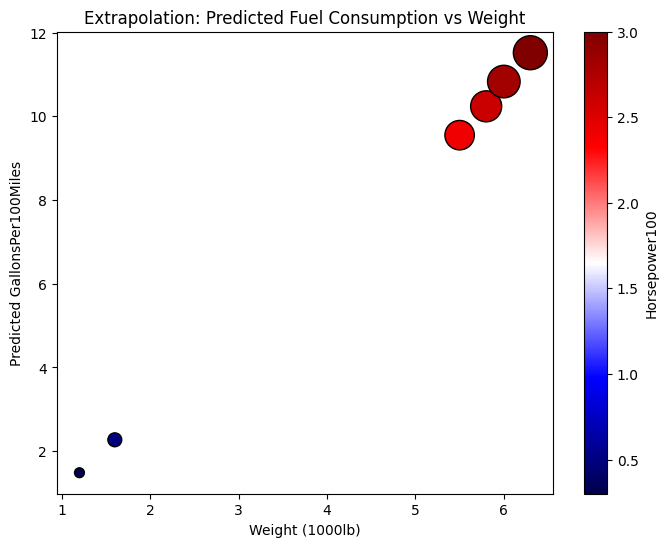

In [ ]:
# x-akseli = autojen paino, y-akseli = ennuste, väri = hevosvoimat, pallon koko = sylinterimäärä
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    extra_cars['Weight1000lb'],
    extra_cars['Predicted_GallonsPer100Miles'],
    c=extra_cars['Horsepower100'],
    s=extra_cars['Cylinders']*50,
    cmap='seismic',
    edgecolor='k'
)

plt.xlabel("Weight (1000lb)")
plt.ylabel("Predicted GallonsPer100Miles")
plt.title("Extrapolation: Predicted Fuel Consumption vs Weight")
cbar = plt.colorbar(scatter)
cbar.set_label("Horsepower100");


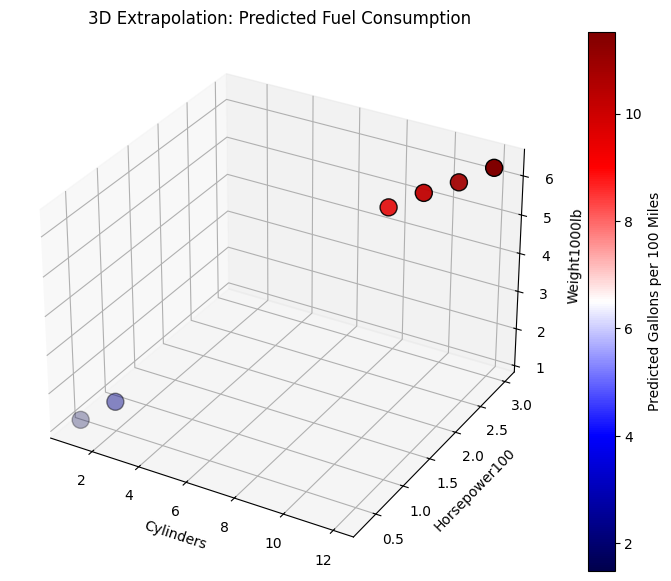

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x = extra_cars['Cylinders']
y = extra_cars['Horsepower100']
z = extra_cars['Weight1000lb']
c = extra_cars['Predicted_GallonsPer100Miles']

sc = ax.scatter(x, y, z, c=c, cmap='seismic', edgecolors='k', s=150)

plt.colorbar(sc, label='Predicted Gallons per 100 Miles')

ax.set_xlabel('Cylinders')
ax.set_ylabel('Horsepower100')
ax.set_zlabel('Weight1000lb')
ax.set_title('3D Extrapolation: Predicted Fuel Consumption');


#### Combination

In [ ]:
combo_cars = pd.DataFrame(
    {
    'Cylinders': [1, 2, 9, 10, 11, 12,3, 4, 4, 5, 6, 6, 7, 8],
    'Horsepower100': [0.3, 0.5, 2.4, 2.6, 2.8, 3.0, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2.0, 2.1],
    'Weight1000lb': [1.2, 1.6, 5.5, 5.8, 6.0, 6.3, 1.7, 2.0, 2.2, 2.4, 3.0, 3.3, 4.0, 4.5]
    })

combo_pred = best_model.predict(combo_cars)
combo_cars['Predicted_GallonsPer100Miles'] = combo_pred

print("Combination predictions:")
print(combo_cars)

Combination predictions:
    Cylinders  Horsepower100  Weight1000lb  Predicted_GallonsPer100Miles
0           1            0.3           1.2                      1.484213
1           2            0.5           1.6                      2.270892
2           9            2.4           5.5                      9.548808
3          10            2.6           5.8                     10.237946
4          11            2.8           6.0                     10.829541
5          12            3.0           6.3                     11.518679
6           3            0.7           1.7                      2.764947
7           4            0.9           2.0                      3.454084
8           4            1.1           2.2                      3.928450
9           5            1.3           2.4                      4.520045
10          6            1.5           3.0                      5.501807
11          6            1.7           3.3                      6.073715
12          7            2

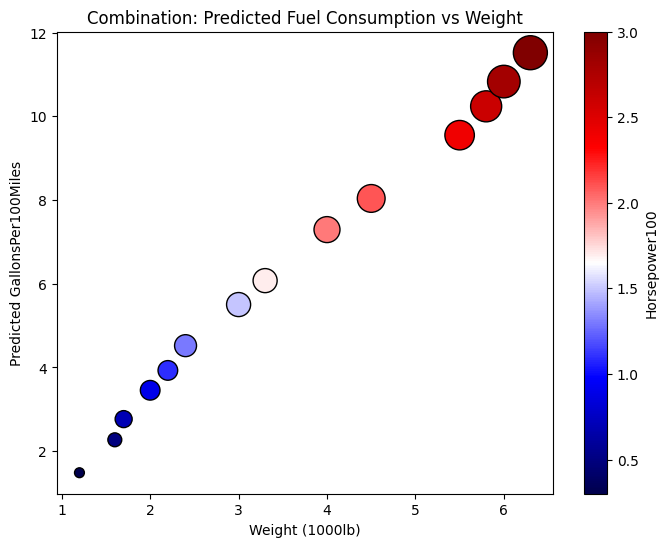

In [ ]:
# x-akseli = autojen paino, y-akseli = ennuste, väri = hevosvoimat, pallon koko = sylinterimäärä
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    combo_cars['Weight1000lb'],
    combo_cars['Predicted_GallonsPer100Miles'],
    c=combo_cars['Horsepower100'],
    s=combo_cars['Cylinders']*50,
    cmap='seismic',
    edgecolor='k'
)

plt.xlabel("Weight (1000lb)")
plt.ylabel("Predicted GallonsPer100Miles")
plt.title("Combination: Predicted Fuel Consumption vs Weight")
cbar = plt.colorbar(scatter)
cbar.set_label("Horsepower100");


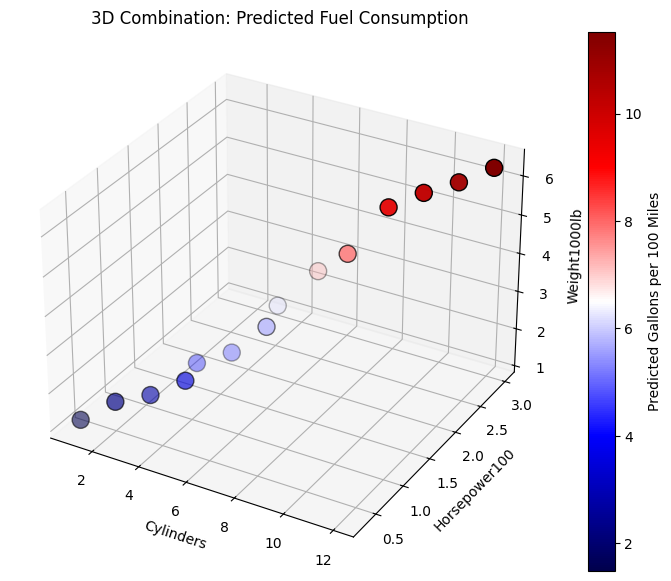

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x = combo_cars['Cylinders']
y = combo_cars['Horsepower100']
z = combo_cars['Weight1000lb']
c = combo_cars['Predicted_GallonsPer100Miles']

sc = ax.scatter(x, y, z, c=c, cmap='seismic', edgecolors='k', s=150)

plt.colorbar(sc, label='Predicted Gallons per 100 Miles')

ax.set_xlabel('Cylinders')
ax.set_ylabel('Horsepower100')
ax.set_zlabel('Weight1000lb')
ax.set_title('3D Combination: Predicted Fuel Consumption');


### Summary

    Interpolation

- Malli toimii hyvin interpolaatioalueella eli syötettäessä arvoja, jotka ovat datasetin alkuperäisten muuttujien sisällä.

- Ennusteet noudattavat loogista lineaarista suhdetta: suurempi moottori, teho ja paino = suurempi kulutus.

- Ennusteet ovat kohtuullisen tasaisia ja lineaarisia datasetin sisäisillä arvoilla.
___
    Extrapolation

- Malli tuottaa arvoja myös datasetin ulkopuolella (esim. 1-2 tai 9-12 sylinteriä).

- Ennusteet jatkavat lineaarista trendiä, mutta luotettavuus heikkenee, koska malli ei tunne todellisuutta näiden arvojen ulkopuolella.

- Lineaarinen malli antaa fysikaalisesti järkeviä suuntauksia (isompi moottori ja teho = enemmän kulutusta), mutta todellisuudessa teknologia, aerodynamiikka tai muut tekijät voivat rikkoa tämän.
___
    Yhteenveto

- Malli on luotettava ennustamaan interpolaatioalueella.

- Ekstrapoloinnin tuloksia kannattaa tulkita varauksella, eikä niitä tule pitää yhtä tarkkoina kuin datasetin sisäisiä arvoja.